<p align ="center"><img src="images/house.jpg" alt="Boston House" height="500" title="Boston House Prices"/></p>

<h1 align ="center">Boston Housing Prices</h1>
<h1 align ="center">Machine Learning and Statistics Project 2019</h1>
<h2 align ="center">Roisin Fallon</h2>


## Table of Contents

1. [Python Libraries](#lib)
2. [Describe: Use descriptive statistics and plots to describe the Boston House Prices dataset.](#sec1)
    * [Boston Housing Dataset](#boston)
    * [DESC](#desc)
    * [Keys](#keys)
    * [Feature Names](#feature)
    * [Head of the dataset](#head)
    * [Tail of the dataset](#tail)
    * [Info](#info)
    * [Cleanng of the data](#clean)
	* [Calculate the percent of missing values](#per)
	* [Drop the columns](#drop)
    * [Statistical Summary of the Boston House Prices](#statis)
    * [ Visualisation of the MEDV Boston House Prices ](#hist)
    * [Statistical Summary of the variables in the Boston dataset](#stats)
    * [Visualisation of the relationship between variables](#pair)
    * [Correlation](#corr)
	* [Tabular form of correlation](#tab)
	* [Heatmap](#heat)
    * [Using statsmodel](#sm)
3. [ Infer: Use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. ](#sec2)
   * [Sataistical summary of the MEDV based on whether the house is located along the river or not](#rn) 
   * [Test for Normality](#norm)
	* [Shapiro-Wilk Test](#shap)
   * [Analysis of variance - ANOVA](#anova)
	* [t-test](#t)
	* [Critical Values](#crit)
   *[Conclusion](#con2)
4. [ Predict: Use keras to create a neural network that can predictthe median house price based on the other variables in the dataset](#pre)
    * [Define Model](#def)
	  * [Activation Function](#act)
	  * [Layers](#layer)
	  * [Neuron\Nodes](#node)
    * [Compile](#co)
	  * [Loss](#loss)
	  * [Optimizer](#opt)
	  * [Neuron\Nodes](#node)
    * [Model Summary](#s)
    * [Fit Model](#fit)
	  * [Epochs](#e)
	  * [Batch size](#ba)
	  * [Validation_split](#va)
	  * [Verbose](#ve)
    * [Train/Val Performance](#tr)
    * [Model Evaluate](#rf)
    * [Effect of Scailing](#rf)
	  * [Why you should apply scailing](#why)
    * [Evaluation of neural network created](#neu)
	  * [Mean Sqaured Error](#mse)
	  * [R Squared](#r)
	  * [Mean Absolute Error](#abs)
	* [Linear Regression Model vs Gradient Boosting Regression model](#grr)
		* [Linear Regression Model](#line)
		* [Gradient Boosting Regressor Model](#boo)
	* [Important Variabels](#pp)
5. [Conclusion](#con)
6. [Bibliography](#bib)

<a name="lib"></a>
# Python Libraries:

<b> Anaconda on your device (version 3.7 +) </b>

 <a href=https://www.anaconda.com/distribution/> Download here </a>

This contains porting for the library listed below. By downloading Anaconda it removes the need to import numerous libraries seperately.
 
 <b> Pandas </b> 
 
 <a href=https://pandas.pydata.org/getpandas.html> Download here </a>
 
This is a Python package designed to strucure information in rows and columns.  It is known for quick and easy data manipulation, aggregation, and visualization.  Python takes in data via a CSV, TSV file or SQL database and creates a Python object called a data frame. Brief Introducton of Panda outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673> here. </a>

<b> NumPy </b> 

<a href=http://www.numpy.org/> Download here </a>

This is a numerical library, performs many mathematical operations and handles i.  Brief introductiion outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-numpy-library-6f61b7dee4db> here. </a>

<b> Matplotlib </b> 

<a href=https://matplotlib.org/downloads.htmll> Download here </a>

This is a plotting library, makes  2D plots  that helps in the visualisation of figures using one or multiple numeric variables. It can generate histograms, pie charts, time series, boxplot, violin plot, stack plot, stem plots and scatter plots.  It can be used in Python scripts, Jupyter notebook, and web application servers.  Brief Introduction outlined  <a href=https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70> here. </a>

<b> Seaborn </b>

This a satistical plotting library  which has more advanced data visualisation than matplotlib (both are plotting libraries). Seaborn produces nice visualizations eliminating much of the work necessary for producing similar visualizations with matplotlib. It gives a high-level interface to draw statistical graphs, making it easier to generate more complex visualizations. Brief introduction outlined <a href=https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850> here. </a>

<b> Scikit-learn </b>

Simple and efficient tool that can be used for data miming or data analysis. It's library contains a lot of effiecient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. It comes as part of the anaconda package Brief introduction outlined <a href=https://scikit-learn.org/stable/install.html > here. </a>

<b> Keras</b>

Keras enables fast experimentation. It allows for easy and fast prototying; Supports both convolutional networks and recurrnet networks,, as well as combinations of the two; Runs seamlessly on CPU and GPU. This is a high level neural network API written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Brief introduction outlined <a href=https://keras.io/> here. </a>

In [1]:
# Import the library for generating random variables
import numpy as np

# Import the library for handling data
import pandas as pd

# Visualisation library
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Import libraries for plotting
import matplotlib.pyplot as plt

# Import the libraries for T-test and ANOVA
import scipy.stats as stats

# inport statsmodels.
import statsmodels.api as sm

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, KFold,  cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer,r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor,  ExtraTreesRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# To plot the graph embedded in the notebook
%matplotlib inline

In [2]:
# Standardise the size of the plots throughout this project
plt.rcParams['figure.figsize'] = (20, 10)

<a name="sec1"></a>
# Describe: Use descriptive statistics and plots to describe the Boston House Prices dataset. 

<a name="boston"></a>
## Boston Housing Dataset 

In [3]:
# Import the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# Adapted from: https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb

#Values
price = boston.target                                   # Target values
feature = boston.data                                   # Attributes values

# Store in DataFrame
attributes = boston.feature_names                       # Feature names
data = pd.DataFrame(feature, columns = attributes)
target = pd.DataFrame(price, columns =['MEDV'])
df = pd.concat([data, target,], axis = 1)               # concat data/target

In [5]:
# Commented out the print statement here as it is difficult to read and interupt.
# print(boston)  

<i> I have decided to code out the print statent for boston (above) as it is difficult to read and interpret. A much better alternative which allows you to extract similar information is the DESC statement (below).

<a name="desc"></a>
## DESCR

This will provide the dataset characteristics for the dataset.

In [6]:
# Describes the dataset

print(boston.DESCR)

print("\n\n**********************************************************************")
print("                            DESC Summary                              ")
print("**********************************************************************")

print("Number of Houses                   : ", data.shape[0])
print("Number of Housing Features         : ", data.shape[1])
print("**********************************************************************\n")

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<a name="keys"></a>

## Keys 

The Boston dataset is a dictinary which holds keys and values for keys. This gives a quick insight into what the boston housing price dataset contains. Fro this we can see that this dataset not only contains data but contains information about this data. <a href=https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/>[1]</a>

In [7]:
# What fields are in this dictionary

print("Keys in the boston dataset: \n", boston.keys())

Keys in the boston dataset: 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


<a name="feature"></a>
## Feature Names

From the shape command we can see that the boston dataset consists fo 506 rows and 13 columns. This command will tell us what each of the 13 columns represent in the dataset. It also indicates that we are missing the MEDV variable which represents the median value of owner-occupied homes in $1000s.

In [8]:
# Determine what each of the columns in the dataset represent

print("\nColumn names of the Boston Dataset represent the following:\n\n", boston.feature_names)   


Column names of the Boston Dataset represent the following:

 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<a name="head"></a>
## Head  of the dataset

The head of the dataset allows us to get a quick look at the datset. Head prints out the first 5 rows by default. A different number can be printed out by passing a number into the paranthese e.g. df.head(2) this prints out the first 2 rows. From the head statement we can see the column names and number of columns.

In [9]:

# Default is the first 5 rows 

print("\n\n**************************************************************************************")
print("                               Head of the Boston Dataset                       ")
print("**************************************************************************************")
df.head()



**************************************************************************************
                               Head of the Boston Dataset                       
**************************************************************************************


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<a name="tail"></a>
## Tail of the dataset

The tail of the dataset prints out the last 5 rows by  default. As described in the head of the dataset a different number of rows can be printed by passing number through the paranthese. By taking the head and tail of the dataset we can see there are 506 rows (0 to 505) although there are other functions that do ths better.

In [10]:
# Print the last 5 rows

print("\n\n**************************************************************************************")
print("                               Tail of the Boston Dataset                       ")
print("**************************************************************************************")
df.tail()



**************************************************************************************
                               Tail of the Boston Dataset                       
**************************************************************************************


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


<a name="info"></a>
## Info 

Provides information on the Boston dataset including names of columns, total number of rows and columns, data type of each column, range index and memory usage.

In [11]:
print("\n*****************************************")
print("Information on the Boston Housing Dataset")
print("*****************************************\n")
df.info()


*****************************************
Information on the Boston Housing Dataset
*****************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


<a name="clean"></a>
## Cleaning of the data

It is important to understand that NaN or missing values can take a number of different forms e.g. 0 or  written as "missing". It can be noted when we ran the head and tail of the dataset there are a number of 0's for ZN and CHAS. Thus, we can replace the 0's with NaN to calculate how much data we are missing. <a href=https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c>[3]</a>

In [12]:
# Copy the dataset for the Descriptive and Interference section
df1 = df.copy(deep=True)

In [13]:
# Adapted from: https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c

df1.ZN.replace(0, np.nan, inplace = True)
df1.CHAS.replace(0, np.nan, inplace = True)

In [14]:
# Rerun the .info() method to determine the details of the missing values in the dataset following the replacement of the 0 values with NaN
print("\n*************************************")
print("  Info on Boston Housing Dataset\n   After Cleaning of the Data")
print("*************************************\n")    
df1.info()


*************************************
  Info on Boston Housing Dataset
   After Cleaning of the Data
*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         134 non-null float64
INDUS      506 non-null float64
CHAS       35 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


<a name="per"></a>
### Calculate the percent of missing values

When we run the code below we can see there is over 70% of the data missing from "ZN" and "CHAS" so we should remove these features as they will impact the result. <a href=https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c>[3]</a>

In [15]:
df1.isnull().sum() / len(data) * 100

CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
MEDV        0.000000
dtype: float64

<a name="drop"></a>
### Dropping the columns 

In [16]:
df1 = df1.drop(['ZN', 'CHAS'], axis = 1)

In [17]:
# Here we rerun the info code to see that there is no missing values 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
CRIM       506 non-null float64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12)
memory usage: 47.6 KB


<a name="statis"></a>
##  Statistical Summary of the Boston House Prices

This is a statistical summary of the pricing in the boston dataset. 

In [18]:
# The following code performs several statistical calculations on the dataset.

# TMinimum price of the data
minimum_price = np.min(price)
# Alternative using pandas
# minimum_price = prices.min()

# Maximum price of the data 
maximum_price = np.max(price)
# Alternative using pandas
# maximum_price = prices.max()

# Mean price of the data
mean_price = np.mean(price)
# Alternative using pandas
# mean_price = prices.mean()

# Median price of the data - 50% i.e. the halfway marker of the dataset
median_price = np.median(price)
# Alternative using pandas
# median_price = prices.median()

# Standard deviation of prices of the data
std_price = np.std(price)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(price, 25)
third_quartile = np.percentile(price, 75)     #  75% of the data has values less than this number        
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics * 1000 as the values in the boston dataaset are in the '000s'

print("\n\n******************************************")
print("Statistics for the Boston Housing dataset")
print("******************************************\n")
print("Minimum Housing Price          : ${:,.0f}".format(minimum_price*1000))
print("Maximum Housing Price          : ${:,.0f}".format(maximum_price*1000))
print("Mean Housing Price             : ${:,.0f}".format(mean_price*1000))
print("Median Housing Price           : ${:,.0f}".format(median_price*1000))
print("Standard deviation of prices   : ${:,.0f}".format(std_price*1000))
print("First quartile of prices       : ${:,.0f}".format(first_quartile*1000))
print("Second quartile of prices      : ${:,.0f}".format(third_quartile*1000))
print("Interquartile (IQR) of prices  : ${:,.0f}".format(inter_quartile*1000))



******************************************
Statistics for the Boston Housing dataset
******************************************

Minimum Housing Price          : $5,000
Maximum Housing Price          : $50,000
Mean Housing Price             : $22,533
Median Housing Price           : $21,200
Standard deviation of prices   : $9,188
First quartile of prices       : $17,025
Second quartile of prices      : $25,000
Interquartile (IQR) of prices  : $7,975


<i> It is important to understand that I multiplied the values by 1000 to reflect the real values </i>

<a name="hist"></a>
## Visualisation of the MEDV Boston House Prices 

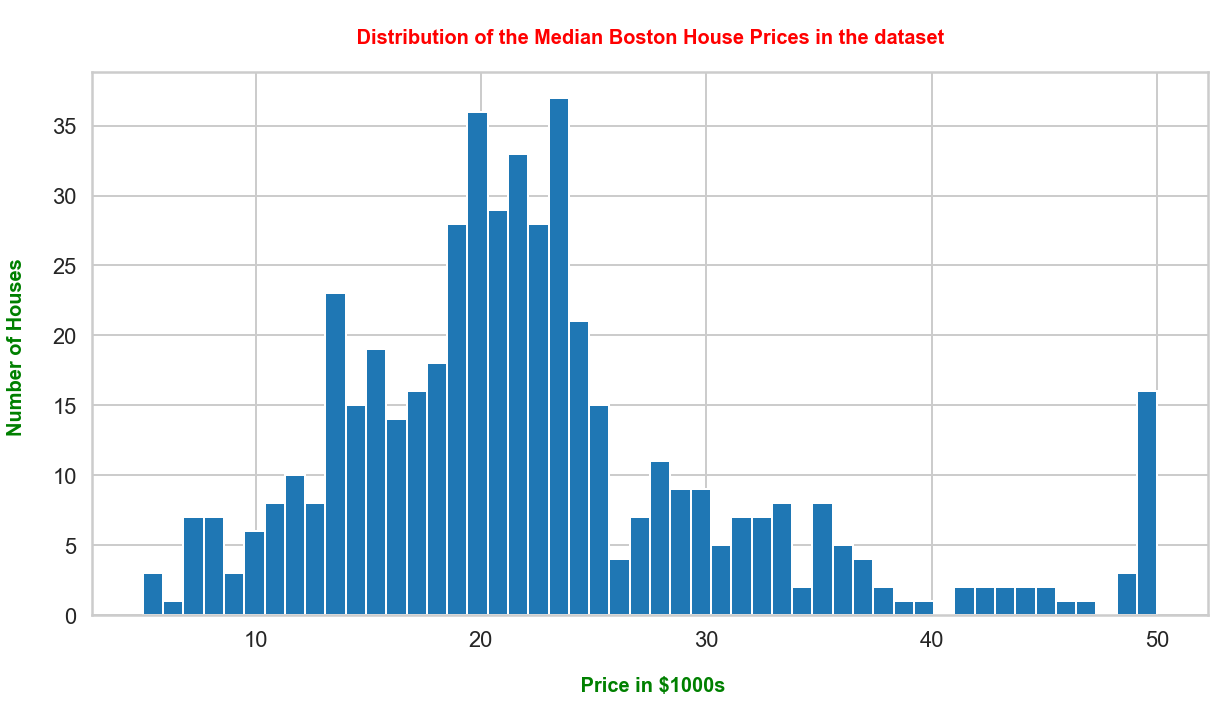

In [19]:
# Quick Visualisation of the house price in the dataset
plt.hist(boston.target,bins=50) 
plt.xlabel("\n Price in $1000s", fontweight="bold", fontsize="20", color="g")                       
plt.ylabel("Number of Houses \n", fontweight="bold", fontsize="20", color="g")                                              
plt.title("\n Distribution of the Median Boston House Prices in the dataset \n", fontweight="bold", fontsize="20", color="r")  
plt.show()

<i> From the above plot we can see that the median house prices are distributed normally with few outliers particularly to the right of the plot. The majority of the house prices are in the region of \\$17,000 to \\$25,000. We can see from the plot that there is appears to be a number of points at the \\$50,000. This could indicate that there is a cap on the MEDV house price of \\$50,000, this is important to note and will be used later in the project. </i>

<a name="stats"></a>
## Statistical Summary of the variables in the Boston dataset

This is an efficient way to summarise each of the columns in the boston dataset. 

In [20]:
# Show the calculated statistics * 1000 as the values in the boston dataaset are in the '000s'

print("\n***********************************************************")
print("      Statistics Summary for the Boston Housing dataset")
print("***********************************************************")
df.describe(include='all').T.round(2)


***********************************************************
      Statistics Summary for the Boston Housing dataset
***********************************************************


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


<a name="pair"></a>
## Visualisation of the relationship between the variables in the Boston dataset

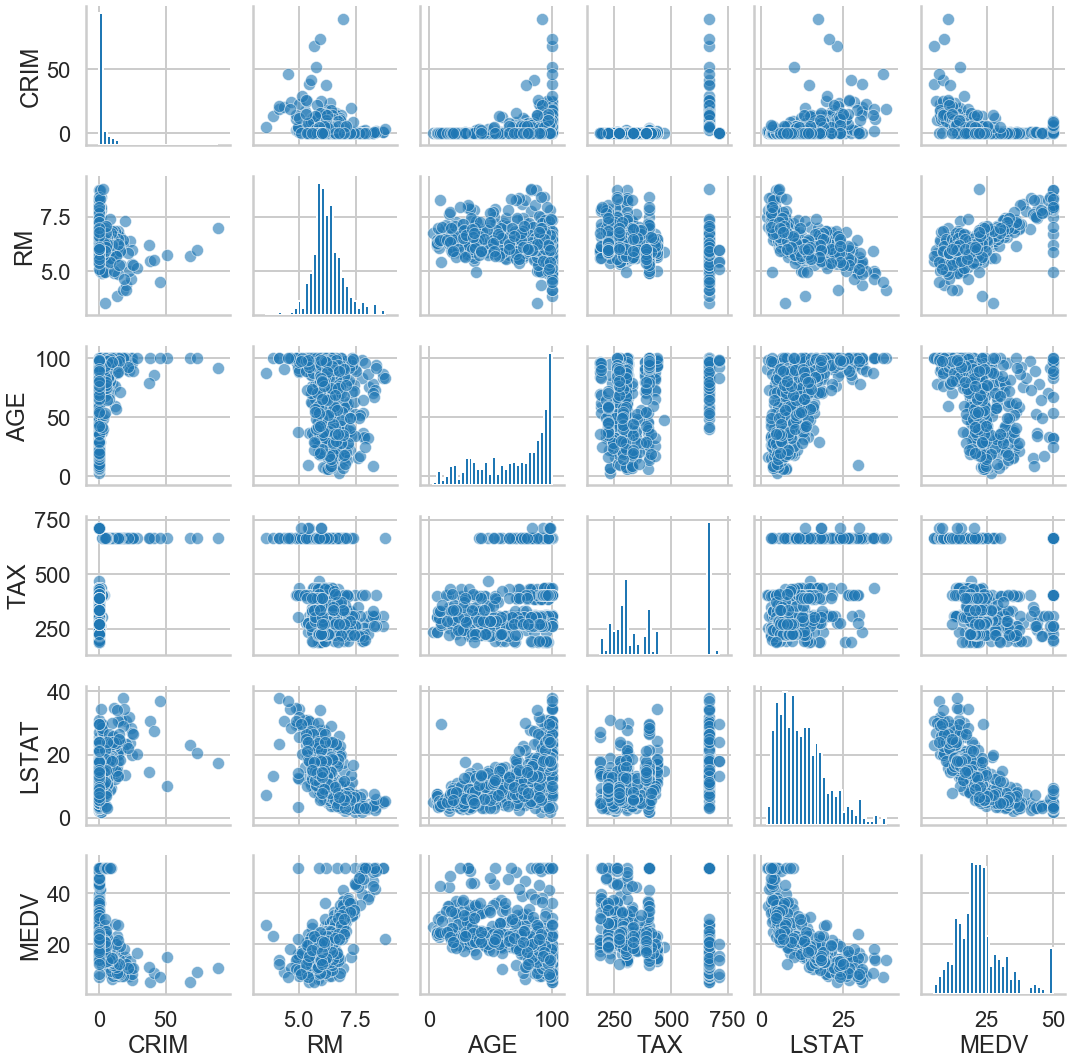

In [21]:
# Plot pairwise relationships in the dataset 
# Adapted from: https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

cols = ['CRIM', 'RM', 'AGE', 'TAX', 'LSTAT', 'MEDV'] 
sns.pairplot(df[cols], plot_kws={'alpha': 0.6}, diag_kws={'bins': 30}) 

### Closer look art the distribution of variables in the dataset

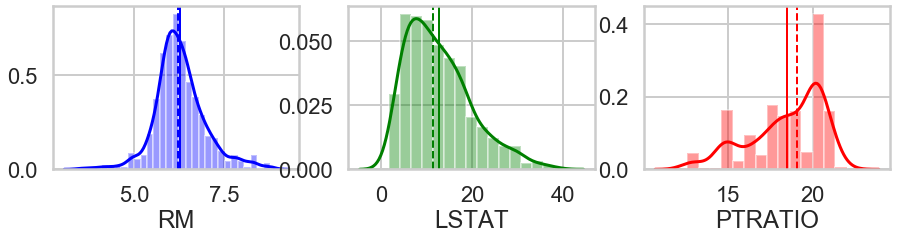

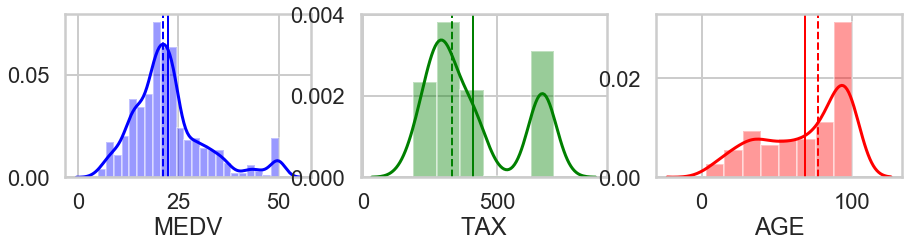

In [22]:
# Allows for a closer look at some of the variables 


clr = ['blue', 'green', 'red']

fig, axs = plt.subplots(ncols=4,figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.subplot(131 + i)
    sns.distplot(df[var],  color = clr[i])
    plt.axvline(df[var].mean(), color=clr[i], linestyle='solid', linewidth=2)
    plt.axvline(df[var].median(), color=clr[i], linestyle='dashed', linewidth=2)
plt.show()

clr = ['blue', 'green', 'red']

fig, axs = plt.subplots(ncols=4,figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['MEDV', 'TAX', 'AGE']):
    plt.subplot(131 + i)
    sns.distplot(df[var],  color = clr[i])
    plt.axvline(df[var].mean(), color=clr[i], linestyle='solid', linewidth=2)
    plt.axvline(df[var].median(), color=clr[i], linestyle='dashed', linewidth=2)
plt.show()

<i>Pairplot is a really simple way to visualize relationships between 2 variables. It produces a matrix of relationships between the selected variaables in your data for an instant examination of our data. It can also be a great jumping off point for determining types of regression analysis to use. <a href=https://medium.com/@jaimejcheng/data-exploration-and-visualization-with-seaborn-pair-plots-40e6d3450f6d>[2]</a>

<b> From the histograms we can note the following:</b>


* RM and MEDV has the closest resembelence to normal distribution. 
* Age is strongly skewed to the left. Skewed is defined in terms of where the mean is positioned in relation to the max. <a href=https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset>[2]</a>
* LSTAT is skewed to the right 
* TAX we can see there is a spike at 700 i.e. a large amount of points are distributed around 700. This is similar to the MEDV histplot from earlier where there are a number of outliers at the \\$50,000 mark.
* CHAS variable is a categorical variable with 2 outcomes YES or NO also known as a binary variable. This will be discussed in detail in Section 2. 

<b> From the scatterplots we can note the following: </b>

* Negative correlation between CRIM and MEDV which infers that higher crime rates are associated with neighbourhoods with lower house values. 
* There is a stronger negative correlation seen between MEDV and LSAT. 
* There is a strong positive correlation between RM and MEDV which infers the higher the median house vaues is associated with higher room number per dwelling.</i>

<a name="corr"></a>
## Correlation

* Correlation matrix measures the relationship between the variables
* Correlation coefficient ranges from -1 to 1
* Values close to 1 infers there is a strong positive correlation between the 2 variables
* Values close to  -1 indicates there is a strong negative correlation <a href=https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155>[4]</a>

<a name="tab"></a>
### Tabular form of correlation

In [23]:
# Table form of the correlation between different variables 
df1.corr()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
INDUS,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461


<a name="heat"></a>
### Heatmap

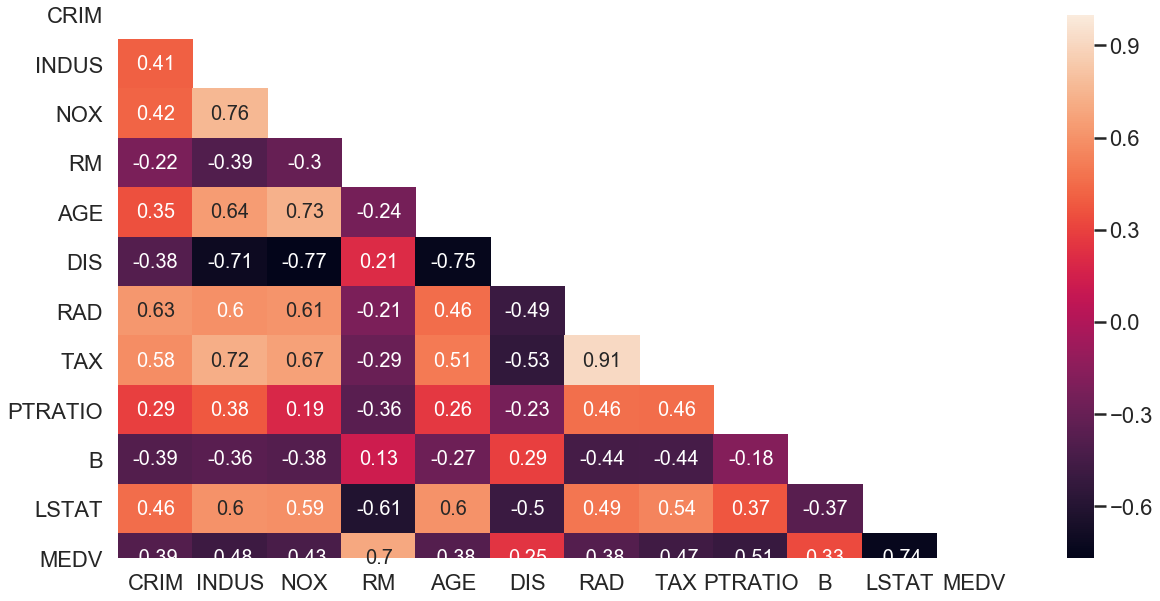

In [24]:
# Adapted from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

corr = df1.corr()

# Create a mask for the upper left triangular portion 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap features
sns.heatmap(corr, mask=mask, annot = True, annot_kws={"size": 20})

<i> <b><u> Observation </u></b>
    
To fit the linear regression model, we are looking for features which have a high correlation with the target varibale (MEDV) 

  * MEDV has a strong positive correlation with RM at 0.7
  * MEDV has a strong negative correlation with LSAT -0.74
  
Multi-co-linearity should be checked prior to selecting the features for linear regression model. These features should not be selected together for training the model as they are strongly correlated to each other

  * The features RAD and TAX have a strong positive correlation of 0.91
  * The features DIS and AGE have a strong negative correlation of -0.75
</i>
<b> Please note the bottom of the correlation plot is cut off after trying a number of ways to fix this it did not work. When researched further I became aware that this is a fault with the matplotlib regression introduced in 3.1.1 which has been fixed in 3.1.2 (still forthcoming). There was an option to downgrade matplotlib to the older version but decided against this as I could still read the numbers from the bootom line
    <a href=https://github.com/mwaskom/seaborn/issues/1773>[5]</a>

<a name="sm"></a>
## Using statsmodel

In [25]:
# Here we will only select the columns that we want to use i.e. not the ones identified as being multi-co-linear
x = df1[["CRIM", "INDUS", "NOX", "RM", "PTRATIO", "B", "LSTAT"]]
y = df1["MEDV"]

# Adappted from: https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb

# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)

# Fit the data.
rsm = msm.fit()

# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     158.2
Date:                Fri, 13 Dec 2019   Prob (F-statistic):          3.22e-122
Time:                        23:14:55   Log-Likelihood:                -1544.1
No. Observations:                 506   AIC:                             3104.
Df Residuals:                     498   BIC:                             3138.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8620      4.548      2.828      0.0

<i> From this we can see the second warning relates to a high condition number. So in the code below I played around with the varibales with the aim of removing variables that have a strong multilinearity. </i>

In [26]:
# Trial and error tried different combinations with the aim of removing multilinearity
x = df1[[ "NOX", "RM", "PTRATIO", "LSTAT", "DIS"]]
y = df1["MEDV"]

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)

# Fit the data.
rsm = msm.fit()

# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Fri, 13 Dec 2019   Prob (F-statistic):          3.67e-131
Time:                        23:14:55   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4992      4.613      8.129      0.0

<i><b> Coefficient Table Section 1: </b> 

<b> R squared</b> 

Is measured on a scale of 0 to 1. A high r squared value indicates that there is a significant relationship between the house price and variables listed. The value of 0.708 is high and indicates that it is a relatively good measure at predicting price

<b> Adj. R-squared </b> indicates that 70.5% of housing prices can be explained by the predictor variables

<b> Coefficient Table Section 2: </b> 

Looking at the second part of the table we can note that the  P>|t|  values are zero this indicates that the variables selected are a statistically significant in predicting house price. 
    
<b> Regression Coefficient (coef):</b>

Represents the change in the dependent variable resulting from a one unit change in the predictor variable where all other variables are being held constant. <a href=https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/>[6]</a>

* RM has the highest coef at 4.1633 which infers that for every extra room the house price would be increased by 4.163 again this would in reality wouldbe \\$4,163 as all the values are represented in the '000s where all other variables are kept constant. 
* PTRATIO regression coefficent is -0.9256. This infers that when there is a higher number of pupils to a teacher sees a reduction in the house price \\$1045.80 where all other variables are kept constant
* DIS (weighted distances to five Boston employment centres) has a coef of -1.1847 which infers that an increase in one unit of DIS sees a decrease in the house price \\$1,184.70 where all other variables are kept constant. 

<b> Confidence Interval (last 2 rows):</b> Refers to the range in which the coefficient  is likely to fall. <a href=https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/>[6]</a>

<b> std err: </b> 

Measures the accuracy of the variables coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population.Standard error is low for all the variables and therefore appears accurate (with the exceotion of "NOX").</i>

<a name="sec2"></a>
       
#  Infer: Use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. 

<a name="rn"></a>
## Sataistical summary of the MEDV based on whether the house is located along the river or not

<p align ="center"><img src="images/boston.jpg" alt="Boston House" width="700" height="500" title="Tip"/></p>

In [27]:
df2= df.copy(deep=True)

df2=df2[df2['MEDV']<50]

In [28]:
# Break the CHAS column into 2 seperate columns based on if they are along the Charles river (1) or other(0)

# Along the Charles river describe function rounded to 2 decimal places
river = df2[df2['CHAS']==1].describe()

# Name the column - Adapted from: https://pythonquestion.com/post/how-can-i-change-name-of-arbitrary-columns-in-pandas-df-using-lambda-function/
river.rename(columns=lambda x:x+'_River', inplace=True) 

# Not along the Charles river describe function rounded to 2 decimal places
other = df2[df2['CHAS']==0].describe()
other.rename(columns=lambda x:x+'_Other',inplace=True) 

# create a new table where you concatenate 
new = pd.concat([river, other], axis=1)

print("\n****************************")
print("     Statistical Summary   ")
print("****************************")
chas = new.loc[:, ['MEDV_River', 'MEDV_Other']]
chas.round(2)


****************************
     Statistical Summary   
****************************


,MEDV_River,MEDV_Other
count,29.00,461.00
mean,23.98,21.49
std,7.02,7.90
min,13.40,5.00
25%,20.00,16.50
50%,22.40,20.60
75%,27.00,24.50
max,46.00,48.80


<i> Looking at both columns from the statistical analysis:
* Max value is \\$50,000 for both as stated earlier this suggests that there was a cap (max value)of \\$50,000 on houses. 
* Mean house price is higher for houses along the Charles river  but there are fewer houses when compared to "Other" houses i.e. houses not along the Charles river </i> 

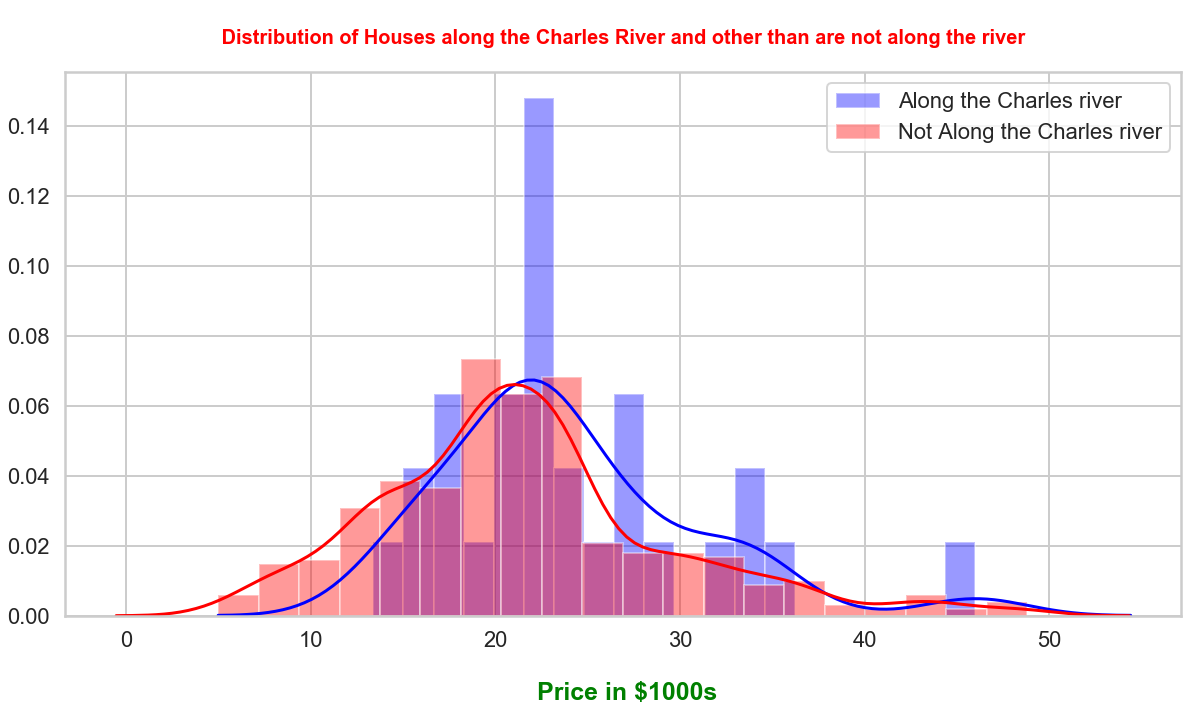

In [29]:
along_river = df2[(df2['CHAS'] == 1)]["MEDV"]
along_other = df2[(df2['CHAS'] == 0)]["MEDV"]

sns.distplot(along_river, bins=20, color="blue", label='Along the Charles river')
sns.distplot(along_other, bins=20, color="red", label='Not Along the Charles river')
plt.xlabel("\n Price in $1000s", fontweight="bold", fontsize="25", color="g") 
plt.title("\n Distribution of Houses along the Charles River and other than are not along the river \n",fontweight="bold", fontsize="20", color="r")
plt.legend()
plt.show()

<i>The plot further solidifies the descriptive statistics in that the Mean for hoouses along the river is higher. The minmum house values is lower for houses not along the river. The max house prices was the same for both \\$50,000.</i>

<a name="norm"></a>
## Tests for normality:

<a name="shap"></a>
### Shapiro-Wilk Test

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution. <a href=https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/>[12]</a> This makes sense as ANOVA is used in normal distribution. 

In [30]:
from scipy.stats import shapiro

close = df2[(df2['CHAS'] == 1)] 
far = df2[(df2['CHAS'] == 0)] 

difference = close - far 
# normality test
stat, p = shapiro(difference)
print('\n Shapiro stats - Houses Not Along Charles River: %.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')



 Shapiro stats - Houses Not Along Charles River: nan, p=1.000
Sample looks Gaussian (fail to reject H0)


C:\Users\roisi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<a name="anova"></a>
## Analysis of variance (ANOVA) <a href=https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb>[7]</a>

ANOVA compares all means simultaneously and maintains the type I error probability at the designated level. <a href=http://grants.hhp.coe.uh.edu/doconnor/PEP6305/Multiple%20t%20tests.htm>[8]</a> Here I have selected 29 houses as sample as there is 29 houses along the river so I used the same number for houses not along the river.

In [31]:
river = df2[df2["CHAS"] == 1]
river_count = river["CHAS"].count()
print("Number of houses that are along the Charles river        :", river_count)

other = df2[df2["CHAS"] == 0]
other_count = other["CHAS"].count()
print("Number of houses that are not along the Charles river    :", other_count)

print("Total houses both along and not along the Charles river  :", other_count + river_count)

mA = river["MEDV"].mean()
print("Mean MEDV for houses along the Charles River             : ${:,.2f}".format(mA))

mB = other["MEDV"].mean()
print("Mean MEDV for houses not along the Charles River         : ${:,.2f}".format(mB))

Number of houses that are along the Charles river        : 29
Number of houses that are not along the Charles river    : 461
Total houses both along and not along the Charles river  : 490
Mean MEDV for houses along the Charles River             : $23.98
Mean MEDV for houses not along the Charles River         : $21.49


In [32]:
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb
# Set parameters for two populations.
popA = {'m': mA ,'s': 0.5}
popB = {'m': mB, 's': 0.5}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 20)
sampB = np.random.normal(popB['m'], popB['s'], 20)

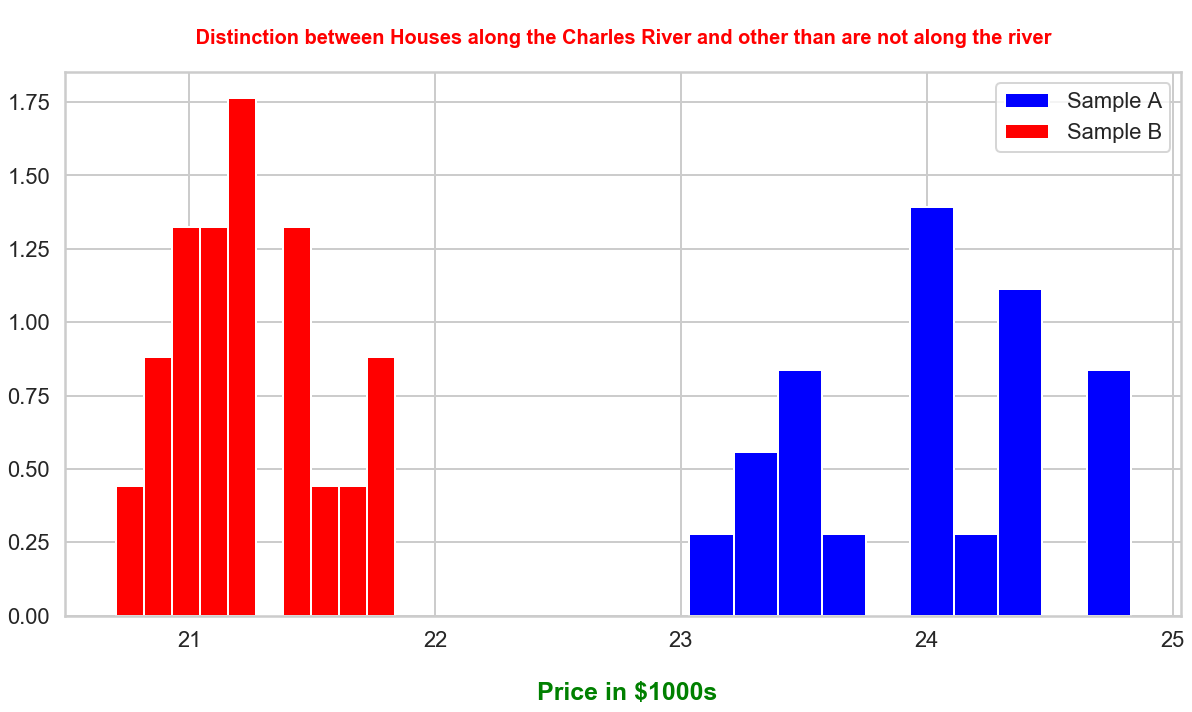

In [33]:
# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='b', label="Sample A")
plt.hist(sampB, density=True, color='r', label="Sample B")
plt.xlabel("\n Price in $1000s", fontweight="bold", fontsize="25", color="g") 
plt.title("\n Distinction between Houses along the Charles River and other than are not along the river \n",fontweight="bold", fontsize="20", color="r")

# Display a legend.
plt.legend()
plt.show()

<a name="t"></a>
### T-test

* t- test finds if there is a significant difference in the mean or median between two independent groups could have happened by chance. <a href=https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/>[9]</a> ttest takes the mean for 2 different groups and determine if there is a significant difference between them. It is important to know that there are 5 assumptions associated with ttest: <a href=https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp#t-test-assumptions>[10]</a><i> 
    1. Scale of meaurement that will be applied to the dataset follows a continous scale
    2. Data collected is from a simple random sample (randomly selected from the total portion)
    3. When data is plotted it is of normal distribution, with this assumption the level of significance can be specified as 5%. 
    4. Reasonably large sample size is used
    5. Homogenity of variance which occurs when the standard deviations of the samples are approx equal. </i>

* If the null hypothesis is true the p value is the probability of obtaining a difference at least as large as that observed due to sampling variation. p value greater than 0.05 we fail to reject the null hypothesis.
<a href="http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1427">[11]</a>
   

In [34]:
# Calculate the independent samples t-statistic for the samples.
# We also get the probability of seeing samples at least as different as these given the population means are equal.
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=20.383453459465013, pvalue=4.66011908852266e-22)

<i> From this we can see that the p > 0.05 and hence can reject the null hypothesis . Thus we could say that the there is a significant difference in the mean median house prices along the Charles river and those that are not. </i>

In [35]:
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb

# Count the samples.
nA = float(len(sampA))
nB = float(len(sampB))

# Calculate the means.
mA = sampA.sum() / nA
mB = sampB.sum() / nB

# Sample variances.
varA = ((sampA - mA)**2).sum() / (nA - 1.0)
varB = ((sampB - mB)**2).sum() / (nB - 1.0)

# Pooled standard deviation.
sp = np.sqrt(((nA - 1.0) * varA + (nB - 1.0) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))

print(f"Mean of sample A:       {mA:8.4f}")
print(f"Mean of sample B:       {mB:8.4f}")
print(f"Size of sample A:       {nA:8.1f}")
print(f"Size of sample B:       {nB:8.1f}")
print(f"Variance of sample A:   {varA:8.4f}")
print(f"Variance of sample B:   {varB:8.4f}")
print(f"Pooled std dev:         {sp:8.4f}")
print(f"t-statistic:            {t:8.4f}")

Mean of sample A:        24.0253
Mean of sample B:        21.2435
Size of sample A:           20.0
Size of sample B:           20.0
Variance of sample A:     0.2715
Variance of sample B:     0.1010
Pooled std dev:           0.4316
t-statistic:             20.3835


<a name="crit"></a>
### Critical values

For a two-tail test (e.g. $H_0$: the means are equal) we reject the null hypothesis $H_0$ if the value of the t-statistic from the samples is further away from zero than the t-statistic at the (0.5/2.0) = 0.025 level. <a href=https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb>[7]</a>

2.024394164575136


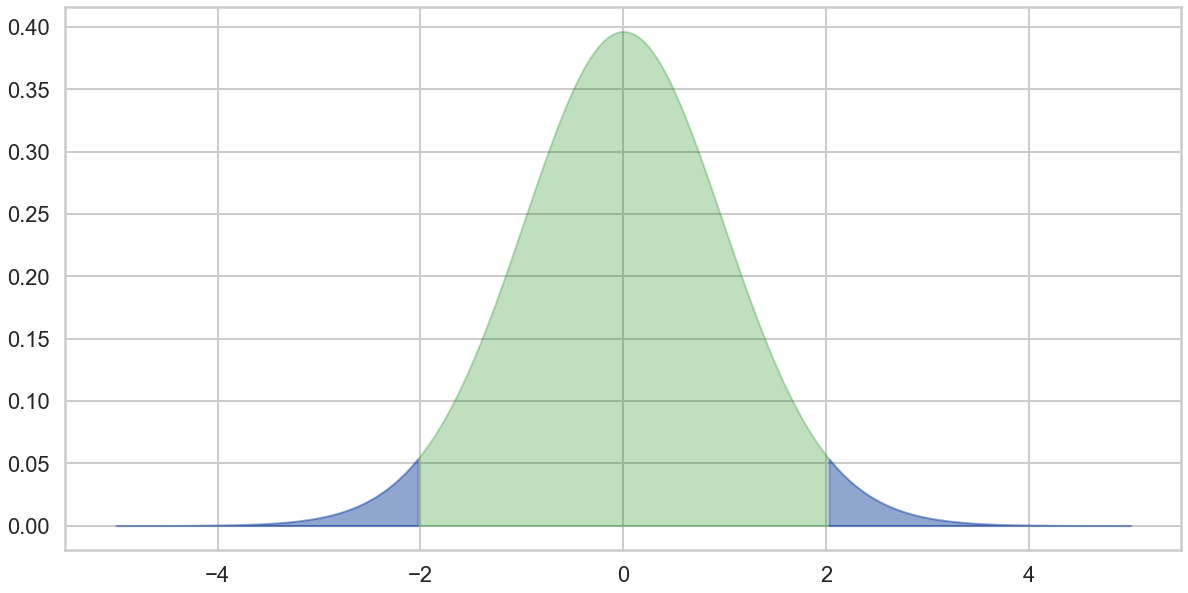

In [36]:
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb
# x values for plotting.
x = np.linspace(-5.0, 5.0, 1000)

# The probability density functions (PDFs) for the t distribution.
# The number of degrees of freedom is (nA + nB - 2).
pdf = stats.t.pdf(x, (nA + nB - 2.0))

# Create a dataframe from x and pdf.
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution.
plt.fill_between(df['x'], df['y'], color='g', alpha=0.25)

# Plot the values more extreme than our |t|.
crit = np.abs(stats.t.ppf(0.975, nA + nB - 2.0))
tail1 = df[df['x'] >=  crit]
tail2 = df[df['x'] <= -crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='b', alpha=0.25)

print(crit)

plt.show()

<a name="con2"></a>
## Conclusion:

We can reject the null hypothesis as the t value is significantly less than the critical value. At a level of 0.05, there is a one in twenty chance that we incorrectly reject the null hypoothesis. Thus we can say that thie is significant difference in the mean house prices for houses along the Charles River and those that are not along the Charles River.

In [37]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import keras as kr
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


<a name="pre"></a>
# Predict: Use keras to create a neural network that can predictthe median house price based on the other variables in the dataset.

In [38]:
df = pd.concat([data, target,], axis = 1)   

df3= df.copy(deep=True)
df3 = df2[df2['MEDV']<50]

In [39]:
# Adapted from: https://books.google.ie/books?id=7zhDDwAAQBAJ&pg=PT358&lpg=PT358&dq=X+%3D+tips%5B%27total_bill%27%5D.values.reshape(-1,1)+Y+%3D+tips%5B%27tip%27%5D.values.reshape(-1,1)&source=bl&ots=vHyyJ7sVqy&sig=ACfU3U1WQO1y3kwv3o_xi-PomAdcojqz9g&hl=en&sa=X&ved=2ahUKEwjtuMrfmovmAhV1o3EKHaAfBpgQ6AEwAHoECAkQAQ#v=onepage&q=X%20%3D%20tips%5B'total_bill'%5D.values.reshape(-1%2C1)%20Y%20%3D%20tips%5B'tip'%5D.values.reshape(-1%2C1)&f=false
# Spliting target variable and independent variables

# Create a dataframe containing the independent variables 
X = df3[['CRIM','ZN', 'CHAS', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT']] .values 
# X = df3.iloc[:, 0:13]

# Dataframe of the median house price Create a dataframe containing the dependent variable
y = df3[["MEDV"]].values.ravel()
# Y = df3.iloc[:, 13:14]

# Split the dataset: 70% data to the training set and 30% data to the test set
# random_state sets a seed to the random generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Training Size                 :", len(X_train))
print("Training Shape                :",X_train.shape)
print("Test Size                     :", len(X_test))
print("Test Shape                    :",X_test.shape)
print("Total Dataset Size            :",len(X_train) + len(X_test))
# Check to ensure that the dataset was split correctly 
# Adapted from: https://www.ritchieng.com/machine-learning-project-boston-home-prices/
print("Training data percentage      :", round(float(X_train.shape[0]) / float(X.shape[0])*100)) 
print("Test data percentage          :", round(float(X_test.shape[0]) / float(X.shape[0])*100))

Training Size                 : 343
Training Shape                : (343, 13)
Test Size                     : 147
Test Shape                    : (147, 13)
Total Dataset Size            : 490
Training data percentage      : 70
Test data percentage          : 30


<a name="def"></a>
## Define Model

<a name="act"></a>
### Activation Function

The activation function of a node defines the output of that node given a set of inputs. They generate an output based in given input signal of a node. This output signal is then used as an input in the subsequent layer of the neural network. 

#### Why you should use activation Function

If no activation function is provided the neural network would be a linear regression model. Non-linear activation function allow for more complex tasks to be performed and allow the generation of greater number of mapping from the input to the output of the neural network. <a href=https://medium.com/@abhinavr8/activation-functions-neural-networks-66220238e1ff>[14]</a> There are a number of activation functions. I have tested the following and have placed in order from worst to best:
   * <b>Sigmoid:</b> real valued, monotonic and differentiable having non-negative first derivative which is bell shaped. Signoid is simple and helos in reducing time required for making model. There big drawback however is info loss due to the derivative having a shorter range. Thus adding more layers would result in more information being compressed and lost at each layer and would consequently have major data loss overall.<a href=https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e>[15]</a>
   * <b>Tanh (Hyperbolic tangent): </b> ranges from -1 to 1 and is S shaped. The advantage of tanh is that negative numbers can be dealt with more easily. It has given me better results than sigmoid but still not as good as Softplus>
   * <b> ReLu: </b> This is the most popular activation function. ReLu is zero for negative x values and a straight line for positive x values. The major benefit is that it does not hae any backpropagation errors (seen in sigmoid) and has faster speed in building models than sigmoid for larger neural networks. The one big drawback of ReLu is that is non zero centered and is non differentiable at 0. I noticed that ReLu performed significantly better by increasing the node number e.g. when input layer was 20 and hidden layer was 10 nodes gave a model evaluation of ~ 6  whereas when I increased the input nodes to 100  and hidden layer nodes to 50 the model evatuation was much better at 0.02.
   * <b> Softplus: </b> Also called a logistic function. Adds more stabilisation and performance to deep neural networks than the ReLu function. <a href=https://medium.com/@vivekpandian08/https-medium-com-types-of-activation-functions-in-neural-network-504ddba28e35>[16]</a>. Although was ReLu was good softplus performed marginal better so decided to use this going forward.

<a name="layer"></a>
### Layers
Refers to stages of computation of the network
   * <b> Input Layer:</b> Refers to the first layer of a networ which contains all input information. Each neuron should represent an input feature. Note the input layer does not have a bias. 
   * <b> Hidden Layer:</b> Layer which sits between input and output layer which can have any number of neurons. I found by adding more layers gave worse results so I stuck to one. 
   * <b> Output Layer: </b>This is the last layer in neural network. The number of outputs desires in classsification problem determines the number of neurons in this layer. On research I noticed that some use a softplus activation function but I found this performed bad in comparasion to linear. 
   * <b>Dense Layer:</b>  Often referred to as a fully connected layer whuch essentially. A layer in a neural network whose neurons connect to each of the neurons in the subsequent layer of the neural network. <a href=https://medium.com/@alex.sambvani/neural-network-glossary-72e4f63d34db>[17]</a>

<a name="neurons "></a>
## Neurons/Nodes

Neuron is an information processing unit in a neural network. Each neuron processes some input by applying an activation function and serves the result of the activation function as its output. <a href=https://medium.com/@alex.sambvani/neural-network-glossary-72e4f63d34db>[17]</a> 

In [40]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(20, input_dim=13, activation="softplus"))
model.add(kr.layers.Dense(10, activation="softplus"))
model.add(kr.layers.Dense(1))

<a name="co"></a>
## Compile Model

The compile method requires the following: 
<a name="loss"></a>
### Loss
A loss function quantifies how close a particular neural network is to the ideal weight during the training process. There are 3 loss functions that I tried that are all considered Regression Loss Functions: 
 * <b> Mean Squared Error:</b> Default lss to use for regression problems. If the distribution is considered Gaussian it is the recommended loss function. Mean squared error is the average of the squared differences between the predicted and actual values. It will always be positive and the perfect value is 0.0. 
 * <b> Mean Squared Logarithmic Error:</b> This can be used when the target value has a spread of values and when predicting a large value, this will ean the model will not be punished as heavily as in mse. 
 * <b> Mean Absolute Error: </b> If the distribution of the target variable is mostly Gaussian but may have more outliers. It calculates the average of the absolute difference between the actual and predicted values. <a href=https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/>[18]</a>
 
<i> Mean Squared Logarithic performed substantially better than the other two loss functions </i>

<a name="opt"></a>
### Optimizer

Optimiser so that the parameters(weights and bias).Optimizers have the goal of minimising loss function Optimizers shape and mold your model into its most accurate possible form by 
 * <b> Adam (Adaptive Moment Estimation): </b> Is one of the most common optimizers. It reaches the lower loss function faster, computationally efficient and has little memory requirement. It is oten see as a combination of Adagrad (works well on sparse gradients) and RMSprop (works well in online and nonstationary settings). ADam keeps an exponentially decaying averae of past gradients. 
 * <b> Nadam: </b> This is applied to noisy gradients. The process is accelerated by summing up the exponential decay of the moving averages for the previous and current gradients. 
 * <b> Adagrad: </b> Is an adaptive learning rate method. It performs larger updates for infrequent parameters and smaller updates for frequent parameters. It works well when data is sparse as in large scale neural network. It eliminates the need to manually tune the learning rate. 
 * <b> RMSProp (Root Mean Square Propagation): </b> It uses a moving average of square gradient and utilises the magnitude of the recent gradient descents to normalize the gradient. The learning rate gets adjusted automatically and it chooses a  different learning rate for each parmaeter. It divides the learning raate by the average of the exponential decay of squared gradients <a href=https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3>[21]</a> <a href="https://books.google.ie/books?id=QlKwDwAAQBAJ&pg=PA129&lpg=PA129&dq=validation_split=0.25&source=bl&ots=oxLdAlD6ds&sig=ACfU3U16m4DaUBTiQe2p8LrzsFaR2u2lzQ&hl=en&sa=X&ved=2ahUKEwi88bfdubPmAhVXilwKHYOzAaAQ6AEwBnoECAoQAQ#v=onepage&q=validation_split=0.25&f=false">[22]</a>

<i> Overall, I found there were 2 optimisers that performed significantly better: nadam and adam and actually producing very similar results. I decided to use adam as it reaches the loss function faster and has little memory requirement. </i>

In [41]:
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

<a name="s"></a>
## Model Summary

In [42]:
# Summary of the model
model.summary()      

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


<a name="fit"></a>
## Fit model

<a name="e"></a>
### Epochs 
Tells us the number of times all the training data has passed through the neural network in the training process. It is recommended that you increase the number of epochs util the accuracy metric with the vaidation data starts to decreas

<a name="ba"></a>
### Batch size
Size of the training set taht is used in each iteration. A random group of  batches are picked during each iteration. The optimal size will deped on many factors which include memory capacity fo the computer where the calcualtions are performed. 

<a name="va"></a>
### Validation_split
When I was researching neural networks I noticed that some articles recommend testing to see if validation split improves your results, which it did. It is important to understand that the train set is split into 2 sets one for training and the other for validation. A split of 0.25 infers that the valudatio set will have 25% of the total. <a href= https://mc.ai/tutorial-on-keras-flow_from_dataframe/>[21]</a><a href="https://books.google.ie/books?id=QlKwDwAAQBAJ&pg=PA129&lpg=PA129&dq=validation_split%3D0.25&source=bl&ots=oxLdAlD6ds&sig=ACfU3U16m4DaUBTiQe2p8LrzsFaR2u2lzQ&hl=en&sa=X&ved=2ahUKEwi88bfdubPmAhVXilwKHYOzAaAQ6AEwBnoECAoQAQ#v=onepage&q=validation_split%3D0.25&f=false">[21]</a>

<a name="ve"></a>
### Verbose 
Simply relates to how the data is printed to the screen i.e. verbose= 0  will show nothing; verbose=1 will show animated progress bar [====================] and verbose=2 will just showthe number of epoch i.e. epoch 1/10

In [43]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs=500, verbose=1, batch_size=10)

Train on 257 samples, validate on 86 samples
Epoch 1/500
257/257 [==============================] - 0s 1ms/step - loss: 1.5691 - val_loss: 0.3085
Epoch 2/500
257/257 [==============================] - 0s 318us/step - loss: 0.3849 - val_loss: 0.3188
Epoch 3/500
257/257 [==============================] - 0s 342us/step - loss: 0.2540 - val_loss: 0.1504
Epoch 4/500
257/257 [==============================] - 0s 318us/step - loss: 0.1650 - val_loss: 0.1183
Epoch 5/500
257/257 [==============================] - 0s 326us/step - loss: 0.1138 - val_loss: 0.1119
Epoch 6/500
257/257 [==============================] - 0s 310us/step - loss: 0.1051 - val_loss: 0.0997
Epoch 7/500
257/257 [==============================] - 0s 365us/step - loss: 0.0976 - val_loss: 0.0956
Epoch 8/500
257/257 [==============================] - 0s 360us/step - loss: 0.0942 - val_loss: 0.1001
Epoch 9/500
257/257 [==============================] - 0s 357us/step - loss: 0.0900 - val_loss: 0.0969
Epoch 10/500
257/257 [========

257/257 [==============================] - 0s 311us/step - loss: 0.0489 - val_loss: 0.0480
Epoch 80/500
257/257 [==============================] - 0s 314us/step - loss: 0.0405 - val_loss: 0.0486
Epoch 81/500
257/257 [==============================] - 0s 314us/step - loss: 0.0513 - val_loss: 0.0910
Epoch 82/500
257/257 [==============================] - 0s 330us/step - loss: 0.0456 - val_loss: 0.0429
Epoch 83/500
257/257 [==============================] - 0s 326us/step - loss: 0.0425 - val_loss: 0.0440
Epoch 84/500
257/257 [==============================] - 0s 320us/step - loss: 0.0490 - val_loss: 0.0681
Epoch 85/500
257/257 [==============================] - 0s 326us/step - loss: 0.0520 - val_loss: 0.0436
Epoch 86/500
257/257 [==============================] - 0s 326us/step - loss: 0.0445 - val_loss: 0.0626
Epoch 87/500
257/257 [==============================] - 0s 322us/step - loss: 0.0447 - val_loss: 0.0428
Epoch 88/500
257/257 [==============================] - 0s 326us/step - loss:

257/257 [==============================] - 0s 310us/step - loss: 0.0431 - val_loss: 0.0397
Epoch 158/500
257/257 [==============================] - 0s 318us/step - loss: 0.0376 - val_loss: 0.0408
Epoch 159/500
257/257 [==============================] - 0s 307us/step - loss: 0.0406 - val_loss: 0.0446
Epoch 160/500
257/257 [==============================] - 0s 319us/step - loss: 0.0404 - val_loss: 0.0460
Epoch 161/500
257/257 [==============================] - 0s 326us/step - loss: 0.0811 - val_loss: 0.0667
Epoch 162/500
257/257 [==============================] - 0s 326us/step - loss: 0.0474 - val_loss: 0.0493
Epoch 163/500
257/257 [==============================] - 0s 330us/step - loss: 0.0520 - val_loss: 0.0372
Epoch 164/500
257/257 [==============================] - 0s 320us/step - loss: 0.0401 - val_loss: 0.0417
Epoch 165/500
257/257 [==============================] - 0s 329us/step - loss: 0.0344 - val_loss: 0.0320
Epoch 166/500
257/257 [==============================] - 0s 323us/ste

257/257 [==============================] - 0s 318us/step - loss: 0.0314 - val_loss: 0.0429
Epoch 236/500
257/257 [==============================] - 0s 299us/step - loss: 0.0343 - val_loss: 0.0461
Epoch 237/500
257/257 [==============================] - 0s 330us/step - loss: 0.0335 - val_loss: 0.0475
Epoch 238/500
257/257 [==============================] - 0s 342us/step - loss: 0.0428 - val_loss: 0.0392
Epoch 239/500
257/257 [==============================] - 0s 307us/step - loss: 0.0335 - val_loss: 0.0445
Epoch 240/500
257/257 [==============================] - 0s 339us/step - loss: 0.0292 - val_loss: 0.0400
Epoch 241/500
257/257 [==============================] - 0s 322us/step - loss: 0.0328 - val_loss: 0.0436
Epoch 242/500
257/257 [==============================] - 0s 332us/step - loss: 0.0302 - val_loss: 0.0451
Epoch 243/500
257/257 [==============================] - 0s 322us/step - loss: 0.0344 - val_loss: 0.0448
Epoch 244/500
257/257 [==============================] - 0s 334us/ste

257/257 [==============================] - 0s 349us/step - loss: 0.0294 - val_loss: 0.0421
Epoch 314/500
257/257 [==============================] - 0s 307us/step - loss: 0.0277 - val_loss: 0.0422
Epoch 315/500
257/257 [==============================] - 0s 303us/step - loss: 0.0295 - val_loss: 0.0480
Epoch 316/500
257/257 [==============================] - 0s 314us/step - loss: 0.0314 - val_loss: 0.0481
Epoch 317/500
257/257 [==============================] - 0s 336us/step - loss: 0.0299 - val_loss: 0.0697
Epoch 318/500
257/257 [==============================] - 0s 341us/step - loss: 0.0333 - val_loss: 0.0721
Epoch 319/500
257/257 [==============================] - 0s 345us/step - loss: 0.0314 - val_loss: 0.0481
Epoch 320/500
257/257 [==============================] - 0s 318us/step - loss: 0.0314 - val_loss: 0.0431
Epoch 321/500
257/257 [==============================] - 0s 349us/step - loss: 0.0291 - val_loss: 0.0423
Epoch 322/500
257/257 [==============================] - 0s 315us/ste

Epoch 391/500
257/257 [==============================] - 0s 295us/step - loss: 0.0288 - val_loss: 0.0412
Epoch 392/500
257/257 [==============================] - 0s 221us/step - loss: 0.0273 - val_loss: 0.0527
Epoch 393/500
257/257 [==============================] - 0s 194us/step - loss: 0.0266 - val_loss: 0.0436
Epoch 394/500
257/257 [==============================] - 0s 190us/step - loss: 0.0282 - val_loss: 0.0368
Epoch 395/500
257/257 [==============================] - 0s 194us/step - loss: 0.0295 - val_loss: 0.0527
Epoch 396/500
257/257 [==============================] - 0s 230us/step - loss: 0.0360 - val_loss: 0.0410
Epoch 397/500
257/257 [==============================] - 0s 326us/step - loss: 0.0265 - val_loss: 0.0386
Epoch 398/500
257/257 [==============================] - 0s 217us/step - loss: 0.0244 - val_loss: 0.0388
Epoch 399/500
257/257 [==============================] - 0s 194us/step - loss: 0.0266 - val_loss: 0.0388
Epoch 400/500
257/257 [==============================] 

Epoch 469/500
257/257 [==============================] - 0s 357us/step - loss: 0.0252 - val_loss: 0.0490
Epoch 470/500
257/257 [==============================] - 0s 373us/step - loss: 0.0343 - val_loss: 0.0599
Epoch 471/500
257/257 [==============================] - 0s 376us/step - loss: 0.0285 - val_loss: 0.0314
Epoch 472/500
257/257 [==============================] - 0s 341us/step - loss: 0.0286 - val_loss: 0.0316
Epoch 473/500
257/257 [==============================] - 0s 380us/step - loss: 0.0251 - val_loss: 0.0342
Epoch 474/500
257/257 [==============================] - 0s 400us/step - loss: 0.0222 - val_loss: 0.0462
Epoch 475/500
257/257 [==============================] - 0s 345us/step - loss: 0.0270 - val_loss: 0.0386
Epoch 476/500
257/257 [==============================] - 0s 341us/step - loss: 0.0257 - val_loss: 0.0337
Epoch 477/500
257/257 [==============================] - 0s 466us/step - loss: 0.0308 - val_loss: 0.0396
Epoch 478/500
257/257 [==============================] 

<a name="tr"></a>
## Train/Val Performance

343/343 [==============================] - 0s 73us/step


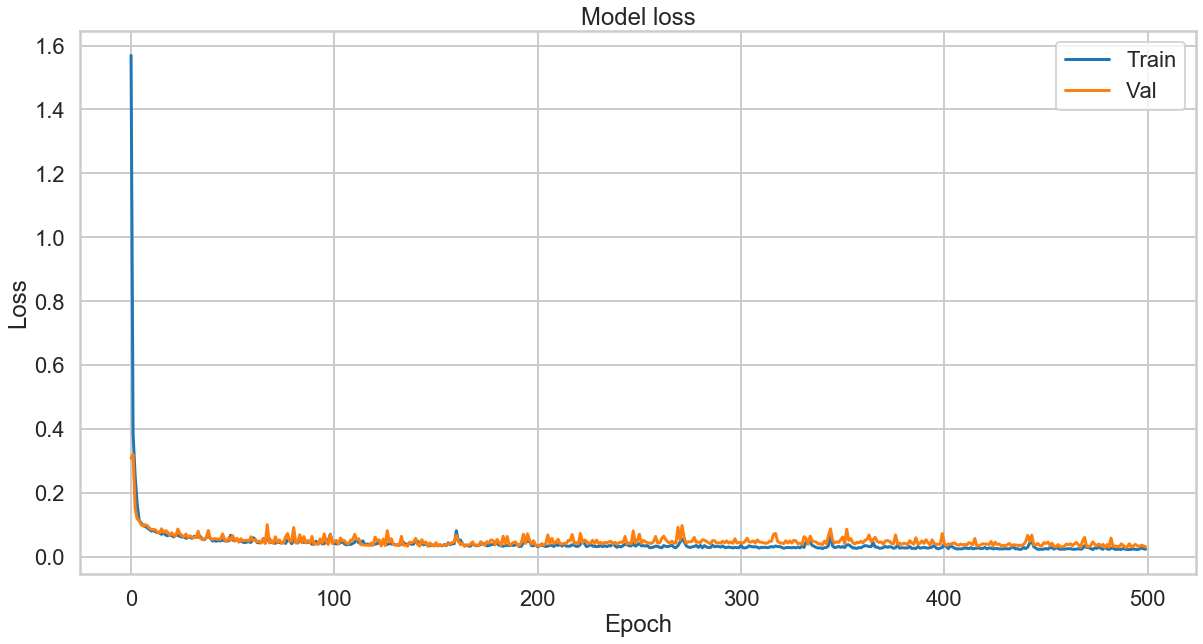

In [44]:
# Adapted from: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
model.evaluate(X_train, y_train)
history.history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<a name="rf"></a>
## Model Evaluate

In [45]:
model.evaluate(X_train, y_train)

343/343 [==============================] - 0s 52us/step


0.02220549253046339

<a name="eff"></a>
## Effect of Scaling

Feature scailing is a method used to standardise the range of independent features of data. Also referred to as normalisation. 

<a name="why"></a>
### Why you should apply scailing
Datasets often contain features that are highly varying in magnitudes, units and range. Most of machine learning algorithms use Euclidian distance between 2 data points in their computations. If nothing is done the algorithms only take in magnitude of features not accounting for the units. Thus scailing will suppress this effect and allow all features to have the same level of magnitude. The following scailing methods were used but found that MinMaxScaler performed the best.
   * <b> StandardScaler : </b>assumes normal distribution of data within each feature. Gaussian distribution as we know is where the distribution is centered around 0 and has a standard deviation is 1. As not all the features are not normally distributed this would not be the best choice.
   * <b> MinMaxScaler: </b> shifts the data such that all features are exactly between 0 and 1 (or -1 and 1 if there are negative values). I selected this method as it works well if the distribution is not Gaussian. This is sensitive to outliers. 
   * <b> RobustScaler: </b> uses interquartile range so is more robust to outliers in the dataset and uses less data for scailing. 
   * <b> Normalizer: </b> scales each value by dividing each value by its magnitude in n dimensional space for n number of features. This performed well getting similar results to MinMaxScaler.  <a href=https://medium.com/analytics-vidhya/feature-scaling-in-scikit-learn-b11209d949e7>[13]</a>
   
   
<i> The reason why I thought it was important to scale the data is because this dataset is not standarised (meaning there are differnt data distributions). Since this is the case we will use StandardScaler funciton as part of the skikit-learn package. </i>

343/343 [==============================] - 0s 49us/step


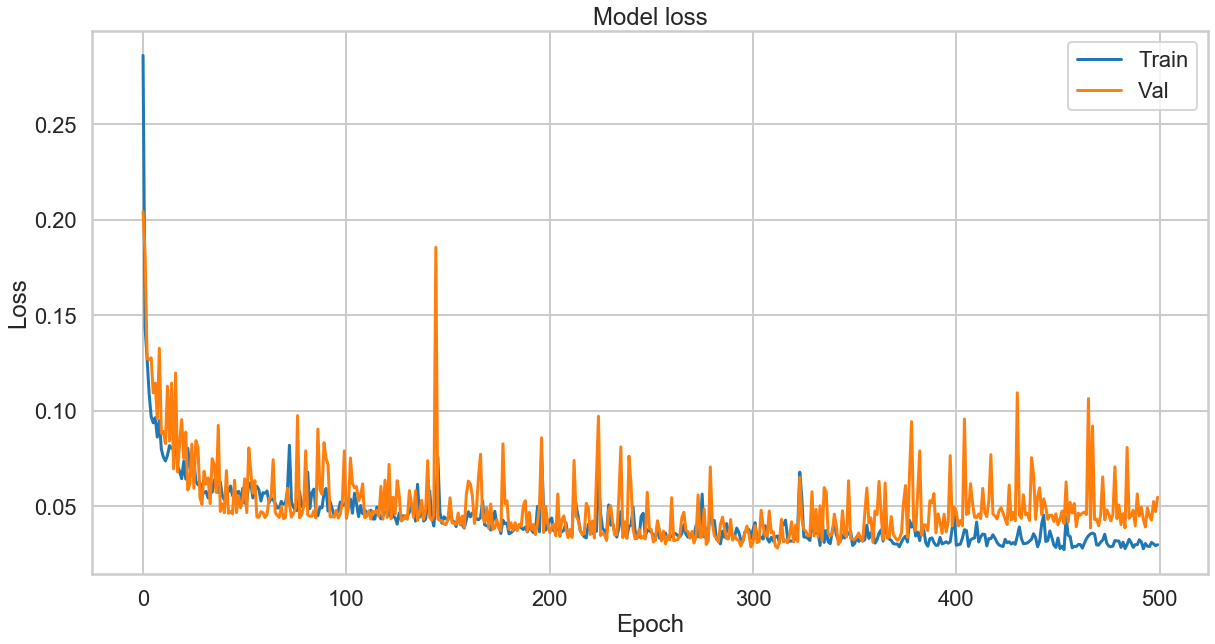

In [46]:
# Same figures used only difference is MinMax Scaler applied

# Adapted from: https://books.google.ie/books?id=vbQlDQAAQBAJ&pg=PT301&lpg=PT301&dq=boston+scaler+%3D+MinMaxScaler()+scaler.fit(X_train)++X_train+%3D+scaler.transform(X_train)+X_test+%3D+scaler.transform(X_test)&source=bl&ots=fxsVQ5I290&sig=ACfU3U3XatIT9bCvJBZDrF-Q0nmJ1omcKw&hl=en&sa=X&ved=2ahUKEwiZs83qi63mAhVStHEKHbfyCIUQ6AEwCnoECAcQAQ#v=onepage&q&f=false

# Create a scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# Transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Same figures used only difference is MinMax Scaler applied 

model = kr.models.Sequential()
model.add(kr.layers.Dense(20, input_dim=13, activation="softplus"))
model.add(kr.layers.Dense(10, activation="softplus"))
model.add(kr.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
history = model.fit(X_train, y_train, validation_split = 0.25, epochs=500, verbose=0, batch_size=10)
model.evaluate(X_train, y_train)
history.history


# Adapted from: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [47]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs=500, verbose=1, batch_size=10)

Train on 257 samples, validate on 86 samples
Epoch 1/500
257/257 [==============================] - 0s 198us/step - loss: 0.0284 - val_loss: 0.0364
Epoch 2/500
257/257 [==============================] - 0s 229us/step - loss: 0.0298 - val_loss: 0.0507
Epoch 3/500
257/257 [==============================] - 0s 202us/step - loss: 0.0284 - val_loss: 0.0470
Epoch 4/500
257/257 [==============================] - 0s 210us/step - loss: 0.0282 - val_loss: 0.0396
Epoch 5/500
257/257 [==============================] - 0s 232us/step - loss: 0.0314 - val_loss: 0.0494
Epoch 6/500
257/257 [==============================] - 0s 241us/step - loss: 0.0317 - val_loss: 0.0450
Epoch 7/500
257/257 [==============================] - 0s 295us/step - loss: 0.0287 - val_loss: 0.0451
Epoch 8/500
257/257 [==============================] - 0s 186us/step - loss: 0.0292 - val_loss: 0.0402
Epoch 9/500
257/257 [==============================] - 0s 198us/step - loss: 0.0323 - val_loss: 0.0431
Epoch 10/500
257/257 [======

257/257 [==============================] - 0s 330us/step - loss: 0.0395 - val_loss: 0.0362
Epoch 80/500
257/257 [==============================] - 0s 342us/step - loss: 0.0315 - val_loss: 0.0417
Epoch 81/500
257/257 [==============================] - 0s 404us/step - loss: 0.0319 - val_loss: 0.0415
Epoch 82/500
257/257 [==============================] - 0s 392us/step - loss: 0.0333 - val_loss: 0.0388
Epoch 83/500
257/257 [==============================] - 0s 369us/step - loss: 0.0287 - val_loss: 0.0565
Epoch 84/500
257/257 [==============================] - 0s 318us/step - loss: 0.0279 - val_loss: 0.0433
Epoch 85/500
257/257 [==============================] - 0s 322us/step - loss: 0.0274 - val_loss: 0.0439
Epoch 86/500
257/257 [==============================] - 0s 318us/step - loss: 0.0276 - val_loss: 0.0437
Epoch 87/500
257/257 [==============================] - 0s 345us/step - loss: 0.0257 - val_loss: 0.0439
Epoch 88/500
257/257 [==============================] - 0s 357us/step - loss:

257/257 [==============================] - 0s 334us/step - loss: 0.0277 - val_loss: 0.0351
Epoch 158/500
257/257 [==============================] - 0s 310us/step - loss: 0.0269 - val_loss: 0.0311
Epoch 159/500
257/257 [==============================] - 0s 359us/step - loss: 0.0257 - val_loss: 0.0509
Epoch 160/500
257/257 [==============================] - 0s 320us/step - loss: 0.0306 - val_loss: 0.0389
Epoch 161/500
257/257 [==============================] - 0s 318us/step - loss: 0.0383 - val_loss: 0.0346
Epoch 162/500
257/257 [==============================] - 0s 345us/step - loss: 0.0312 - val_loss: 0.0515
Epoch 163/500
257/257 [==============================] - 0s 368us/step - loss: 0.0542 - val_loss: 0.0643
Epoch 164/500
257/257 [==============================] - 0s 361us/step - loss: 0.0353 - val_loss: 0.0492
Epoch 165/500
257/257 [==============================] - 0s 369us/step - loss: 0.0269 - val_loss: 0.0296
Epoch 166/500
257/257 [==============================] - 0s 348us/ste

257/257 [==============================] - 0s 357us/step - loss: 0.0285 - val_loss: 0.0336
Epoch 236/500
257/257 [==============================] - 0s 359us/step - loss: 0.0272 - val_loss: 0.0329
Epoch 237/500
257/257 [==============================] - 0s 345us/step - loss: 0.0262 - val_loss: 0.0408
Epoch 238/500
257/257 [==============================] - 0s 345us/step - loss: 0.0285 - val_loss: 0.0361
Epoch 239/500
257/257 [==============================] - 0s 404us/step - loss: 0.0258 - val_loss: 0.0372
Epoch 240/500
257/257 [==============================] - 0s 322us/step - loss: 0.0265 - val_loss: 0.0318
Epoch 241/500
257/257 [==============================] - 0s 450us/step - loss: 0.0246 - val_loss: 0.0248
Epoch 242/500
257/257 [==============================] - 0s 404us/step - loss: 0.0293 - val_loss: 0.0270
Epoch 243/500
257/257 [==============================] - 0s 369us/step - loss: 0.0267 - val_loss: 0.0425
Epoch 244/500
257/257 [==============================] - 0s 427us/ste

257/257 [==============================] - 0s 326us/step - loss: 0.0296 - val_loss: 0.0342
Epoch 314/500
257/257 [==============================] - 0s 334us/step - loss: 0.0292 - val_loss: 0.0275
Epoch 315/500
257/257 [==============================] - 0s 326us/step - loss: 0.0242 - val_loss: 0.0393
Epoch 316/500
257/257 [==============================] - 0s 317us/step - loss: 0.0280 - val_loss: 0.0299
Epoch 317/500
257/257 [==============================] - 0s 342us/step - loss: 0.0254 - val_loss: 0.0311
Epoch 318/500
257/257 [==============================] - 0s 338us/step - loss: 0.0259 - val_loss: 0.0244
Epoch 319/500
257/257 [==============================] - 0s 323us/step - loss: 0.0272 - val_loss: 0.0415
Epoch 320/500
257/257 [==============================] - 0s 345us/step - loss: 0.0249 - val_loss: 0.0231
Epoch 321/500
257/257 [==============================] - 0s 373us/step - loss: 0.0259 - val_loss: 0.0245
Epoch 322/500
257/257 [==============================] - 0s 373us/ste

257/257 [==============================] - 0s 349us/step - loss: 0.0247 - val_loss: 0.0311
Epoch 392/500
257/257 [==============================] - 0s 353us/step - loss: 0.0236 - val_loss: 0.0266
Epoch 393/500
257/257 [==============================] - 0s 310us/step - loss: 0.0244 - val_loss: 0.0248
Epoch 394/500
257/257 [==============================] - 0s 322us/step - loss: 0.0333 - val_loss: 0.0287
Epoch 395/500
257/257 [==============================] - 0s 324us/step - loss: 0.0241 - val_loss: 0.0356
Epoch 396/500
257/257 [==============================] - 0s 345us/step - loss: 0.0252 - val_loss: 0.0280
Epoch 397/500
257/257 [==============================] - 0s 353us/step - loss: 0.0241 - val_loss: 0.0234
Epoch 398/500
257/257 [==============================] - 0s 338us/step - loss: 0.0254 - val_loss: 0.0306
Epoch 399/500
257/257 [==============================] - 0s 334us/step - loss: 0.0245 - val_loss: 0.0239
Epoch 400/500
257/257 [==============================] - 0s 338us/ste

257/257 [==============================] - 0s 369us/step - loss: 0.0252 - val_loss: 0.0234
Epoch 469/500
257/257 [==============================] - 0s 365us/step - loss: 0.0234 - val_loss: 0.0231
Epoch 470/500
257/257 [==============================] - 0s 338us/step - loss: 0.0259 - val_loss: 0.0299
Epoch 471/500
257/257 [==============================] - 0s 345us/step - loss: 0.0228 - val_loss: 0.0264
Epoch 472/500
257/257 [==============================] - 0s 334us/step - loss: 0.0236 - val_loss: 0.0272
Epoch 473/500
257/257 [==============================] - 0s 380us/step - loss: 0.0241 - val_loss: 0.0256
Epoch 474/500
257/257 [==============================] - 0s 318us/step - loss: 0.0299 - val_loss: 0.0434
Epoch 475/500
257/257 [==============================] - 0s 344us/step - loss: 0.0252 - val_loss: 0.0232
Epoch 476/500
257/257 [==============================] - 0s 326us/step - loss: 0.0236 - val_loss: 0.0273
Epoch 477/500
257/257 [==============================] - 0s 365us/ste

In [48]:
model.evaluate(X_train, y_train)

343/343 [==============================] - 0s 61us/step


0.02292619192152781

<i> This part of the project has been time consuming and tedious and could be considered trial and error, changing one parameter at a time to see if it having the desired effect. Extensive research (see bibliogrpahy) pointed me in the right direction in certain cases e.g. some parameters are very sensitive to outliers. However, even after the research and experimentation this neural network model created may still not be the best way to represent the dataset. One factor that may have caused an issue is  the size of this dataset, apparently neural networks work best on large datasets. However, I have learned alot up until this point regarding neural networks and if I was to do it again I would have a better understanding of what it is all about. </i>

<a name="neu"></a>
## Evaluation of neural network created:

At this stage we want to test the accuracy of the neural network model we created. The best way to do this is using Linear Regression Model but the question is which one? In the code below we will test a number of different regression models to see which best fits the dataset. Within in this there is a 20 fold cross validation method which infers we split the training data into train and tes data using test_size parameter for 20 folds. Each fold will have different samples that will not be in other folds. The baseline accuracy that will be used is Mean Squared Error <a href=https://gogul.dev/software/regression-example-boston-housing-prices>[23]</a>

<a name="mse"></a>
### Mean Squared Error

This tells us how close a regression line is to a set of points. It works by squaring the distance from every data point to the regression line. These distances are known as "errors. The reason why the "errors" are squared to prevent negative values from cancelling out positive values and give more weight to larger differences. It is referred to mean squared error as they are finding average of a set of errors. Small mean square error the closer you are to finding the line of best fit. Hence it is always non-zero and values closer to zero are better. <a href=https://www.statisticshowto.datasciencecentral.com/mean-squared-error/>[19]</a>

Linear: -16.25, 5.71
Lasso: -20.53, 7.24
ElasticNet: -19.19, 6.83
KNN: -32.81, 8.29
DecisionTree: -16.54, 4.0
SVR: -63.39, 17.06
AdaBoost: -12.12, 5.47
GradientBoost: -9.04, 5.27
RandomForest: -11.77, 5.7
ExtraTrees: -9.42, 4.3


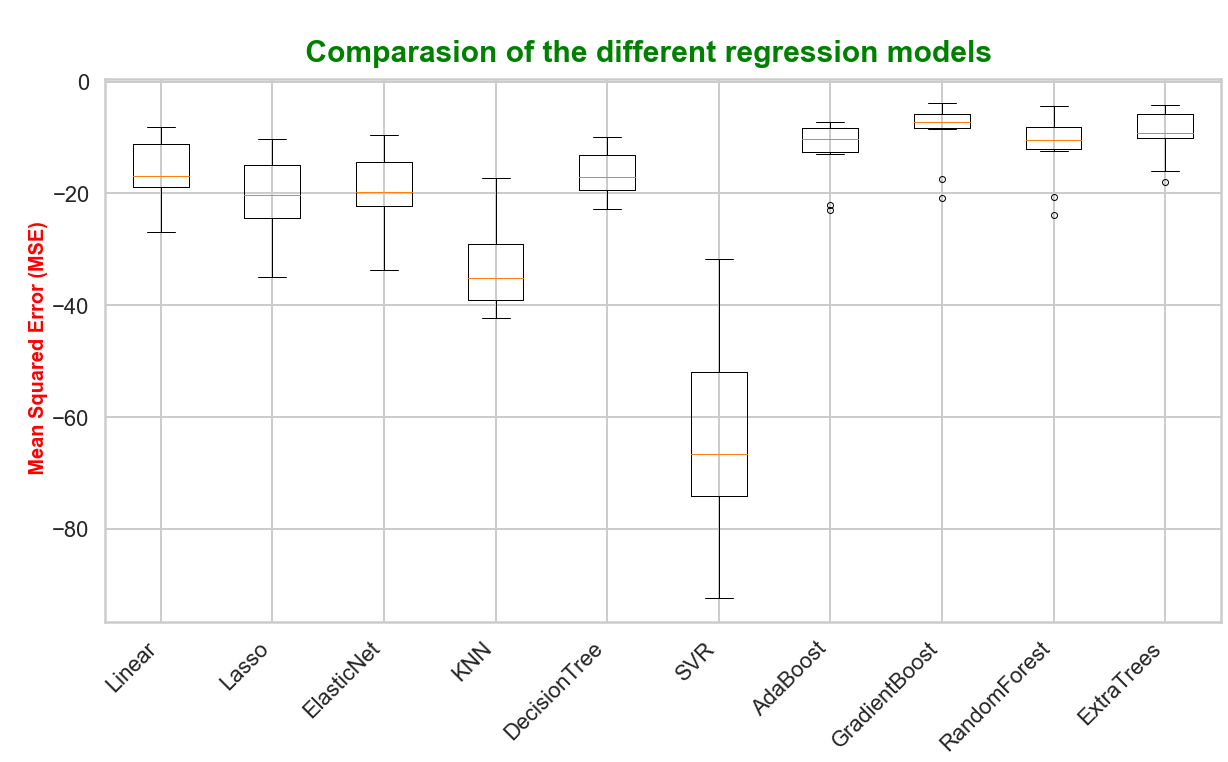

In [49]:
# Adapted from: https://gogul.dev/software/regression-example-boston-housing-prices

# This allows for different regression models to be held in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

# Cross validation of the model specified as 10 fold earlier
model_results = [] 
model_names   = []

# for loop which iterates through the models
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=10, random_state=7)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring="neg_mean_squared_error")
    model_results.append(results) # result is added to the model_results =[]
    model_names.append(model_name) # name is added to the model_name=[]
    print("{}: {}, {}".format(model_name, round(results.mean(), 2), round(results.std(), 2)))

# Create a boxplot which allows for comparasion of the different regression models
figure = plt.figure()
figure.suptitle('\n Comparasion of the different regression models',fontweight="bold", fontsize="30", color="g")
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("\n Mean Squared Error (MSE)", fontweight="bold", fontsize="20", color="r")
plt.show()

<i> Looking at the regression models above we can see that th Gradient Boosting Regression model shows the best performance as the MSE value is the lowest. Thus, this will be the model that will be selected going forward. </i>
  
###  Mean Squared Error 

Please note this has been described in the cell above.

<a name="r"></a>
### R Squared

This is a statistical measure of fit that tells us how much variation of a dependent variable is explained by the independent variable(s) in a regression model. R2 values range from 0 to 1. 100% r2 means that all dependent variables are completely explained by the indepedent variable.

<a name="abs"></a>
### Mean Absolute Error (MAE)

Measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.<a href=https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d>[24]</a>
    
    
In the cell below I demonstrated how not using the correct regression model could impact results: difference between linear regression and GradientBoost.

<a name="grr"></a>
### Linear Regression Model vs Gradient Boosting Regression model

<a name="line"></a>
### Linear Regression Model

In [50]:
# Adapted from: https://books.google.ie/books?id=7zhDDwAAQBAJ&pg=PT358&lpg=PT358&dq=X+%3D+tips%5B%27total_bill%27%5D.values.reshape(-1,1)+Y+%3D+tips%5B%27tip%27%5D.values.reshape(-1,1)&source=bl&ots=vHyyJ7sVqy&sig=ACfU3U1WQO1y3kwv3o_xi-PomAdcojqz9g&hl=en&sa=X&ved=2ahUKEwjtuMrfmovmAhV1o3EKHaAfBpgQ6AEwAHoECAkQAQ#v=onepage&q=X%20%3D%20tips%5B'total_bill'%5D.values.reshape(-1%2C1)%20Y%20%3D%20tips%5B'tip'%5D.values.reshape(-1%2C1)&f=false

# Create linear regression object
lr = LinearRegression()

# Specify the predictor X and the response y 
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

# Mean Squared Error rounded to 2 decimal places
print("Mean Square Error        : {}".format(round(mean_squared_error(y_test, predict), 2)))

# Mean Absolute Error rounded to 2 decimal places
print("Mean Absolute Error      : {}".format(round(mean_absolute_error(y_test, predict), 2)))

# Calculate r squared rounded to 2 decimal places 
print("R-Squared                : {}".format(round(lr.score(X_train, y_train), 2)))

# Determine the how accurate this algorthm is at predicting values
y_predict= lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predict.flatten()})
df.head(10)

Mean Square Error        : 12.93
Mean Absolute Error      : 2.78
R-Squared                : 0.78


,Actual,Predicted
0,19.1,16.170307
1,23.9,25.275082
2,13.4,16.126135
3,7.0,9.048073
4,10.8,11.775641
5,18.5,19.903965
6,12.7,13.405097
7,46.7,34.651096
8,17.5,19.287284
9,23.3,28.077740


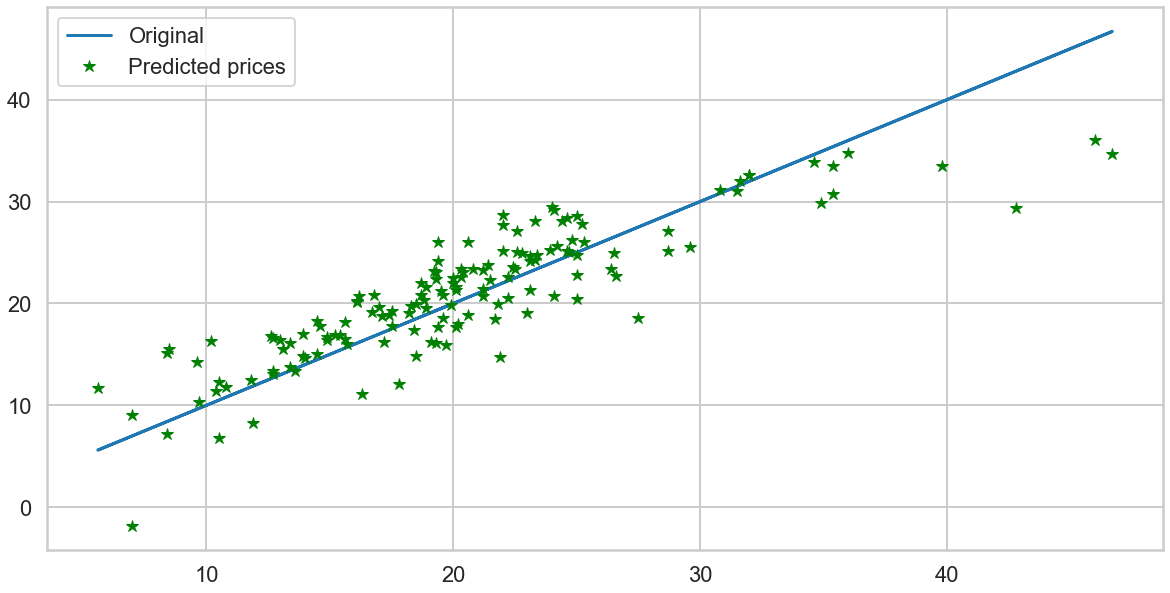

In [51]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
predict_price = linear_model.predict(X_test)
plt.plot(y_test, y_test, label='Original')
plt.plot(y_test, predict_price, '*g', label='Predicted prices')
plt.legend()
plt.show()

<i> From this we can see the line of best fit is quiet good as we can see there are a number of outliers towards the top of the dataset. Mean Square Error value of 12.93 infers that are model is able to predict correct house price on data with MSE of 12.93

<a name="boo"></a>
### Gradient Boosting Regressor Model

In [52]:
# create and fit the best regression model
grad = GradientBoostingRegressor()
grad.fit(X_train, y_train)

# Predict using the Gradient Model
predicts = grad.predict(X_test)

# Mean Squared Error rounded to 2 decimal places
print("Mean Square Error        : {}".format(round(mean_squared_error(y_test, predicts), 2)))

# Mean Absolute Error rounded to 2 decimal places
print("Mean Absolute Error      : {}".format(round(mean_absolute_error(y_test, predicts), 2)))

# Calculate r squared rounded to 2 decimal places 
print("R-Squared                : {}".format(round(grad.score(X_train, y_train), 2)))

# Determine the how accurate this algorthm is at predicting values
dfg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicts.flatten()})
dfg.head(10)

Mean Square Error        : 5.83
Mean Absolute Error      : 1.86
R-Squared                : 0.98


,Actual,Predicted
0,19.1,16.390231
1,23.9,21.999409
2,13.4,14.116987
3,7.0,12.568390
4,10.8,10.094547
5,18.5,20.435431
6,12.7,15.006766
7,46.7,42.855305
8,17.5,20.242608
9,23.3,26.117152


<i>The best regression model is clearly the Gradient Boosting Regression. It significantly improves all 3 values but most importantly it reduces mse to 5.83 (linear model was 12.93 - it has more than halved the mse), the closer this value is to 0 the closer you are to finsing the line of best fit. Mean Absolute Error as we know measure the difference between value and "true" value or put simply the error in your measurements. Again the Gradient model improved this result as it went from 2.78 to 1.86, this is actually quiet good. R squared in the case of Gradient Boosting Regression is 0.98 which is excellent and indicates that there is a sinificant relationship between the house price and variables listed and hence is a good measure of predicting house price. </i>

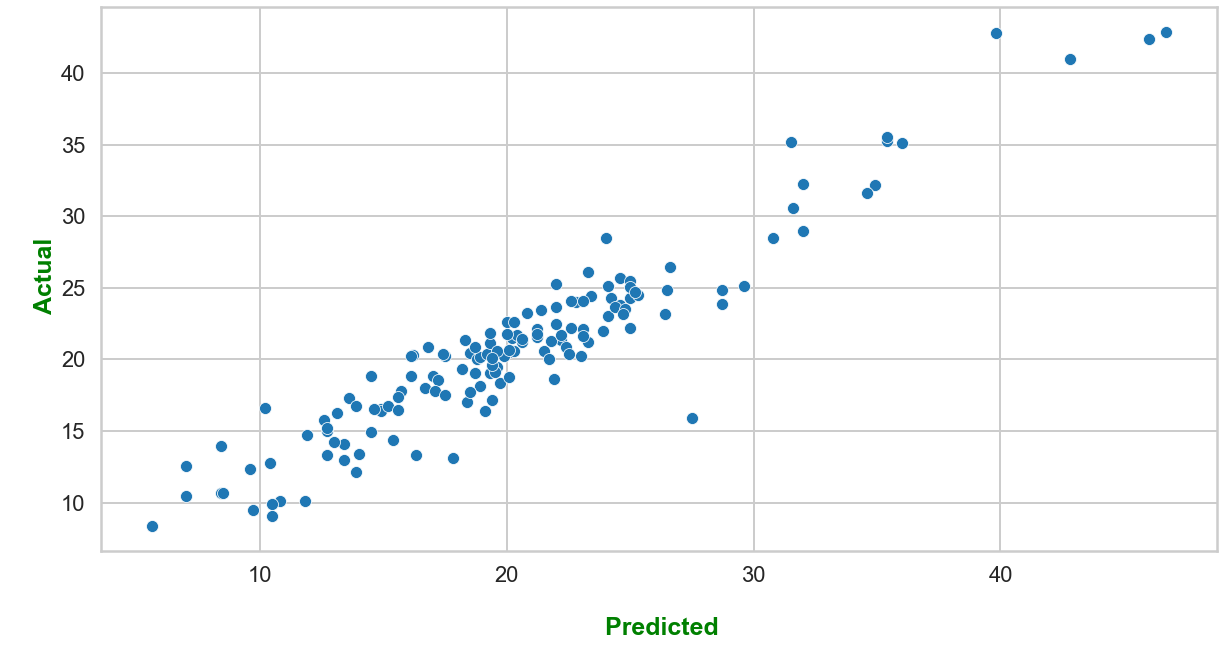

In [53]:
sns.scatterplot(x='Actual', y='Predicted', data=dfg)
plt.xlabel("\n Predicted", fontweight="bold", fontsize="25", color="g") 
plt.ylabel("\n Actual", fontweight="bold", fontsize="25", color="g") 
plt.show()

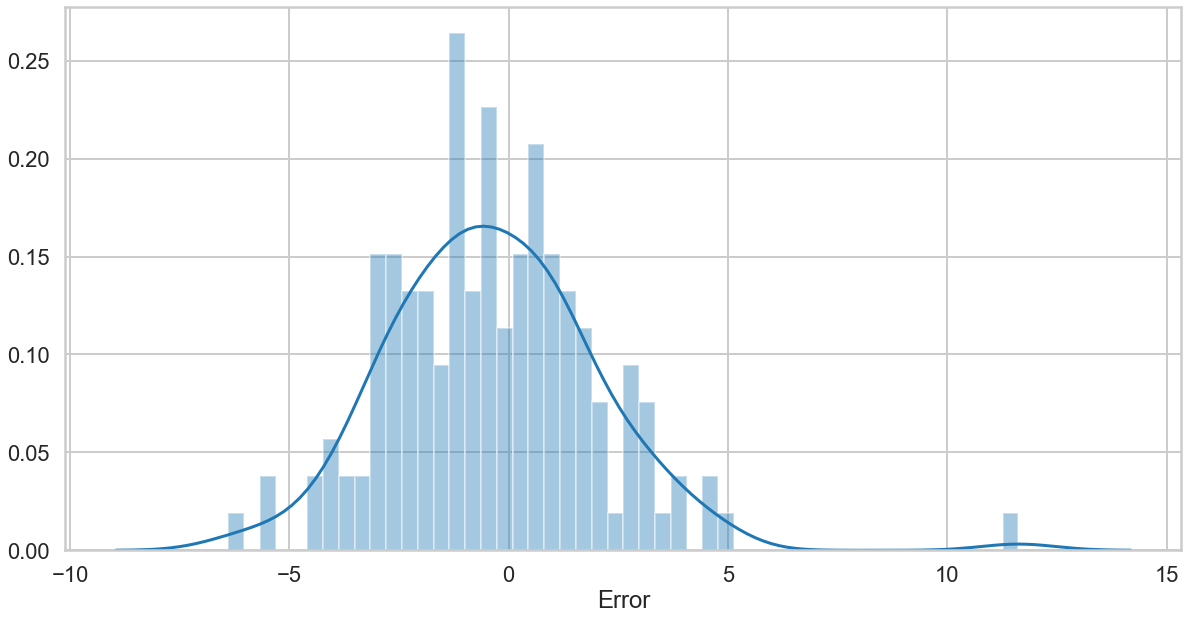

In [54]:
dfg['Error'] = dfg['Actual'] - dfg['Predicted']
sns.distplot(dfg['Error'], bins=50)

<i> We can see from the graph that most of the times the predictions were correct (difference = 0). </i>

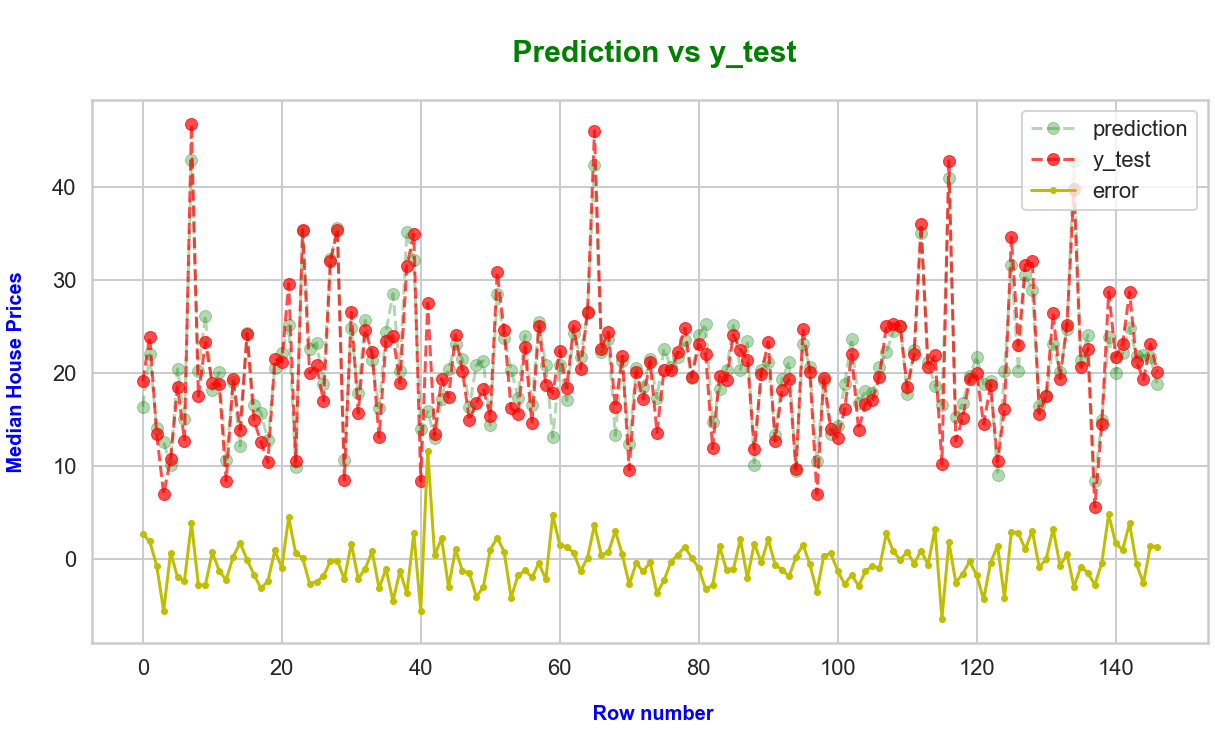

In [55]:
# Adapted from: https://gogul.dev/software/regression-example-boston-housing-prices
# plot between predictions and Y_test
diff = y_test - predicts
x_axis = np.array(range(0, predicts.shape[0]))
plt.plot(x_axis, predicts, linestyle="--", marker="o", alpha=0.3, color='g', label="prediction")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='r', label="y_test")
plt.plot(x_axis, diff, linestyle="-", marker=".",alpha=1, color='y', label="error")
plt.xlabel('\n Row number', fontweight="bold", fontsize="20", color="b")
plt.ylabel(' Median House Prices \n', fontweight="bold", fontsize="20", color="b")
plt.title('\n Prediction vs y_test\n', fontweight="bold", fontsize="30", color="g")
plt.legend(loc='upper right')
plt.show()

<i> We can see that Gradient Boosting Regression model achieved a lower mean squared error and higher r2. A flatter error line is associated with a more accurate model. </i>

<a name="pp"></a>
### Important Variables 
    
Using the Gradeint Boosting Regression model to create the trained model, we are now able to see the relative important each of the 13 indepedent variables (features) are in predicting the MEDV (target variable). It is evident from the above plot that RM and LSATAT are the most important of all the variables. On the other end of the scale ZN, RAD and CHAS variables are not as important when determing the MEDV. Analyzing feature importance is useful in determining if your chosen model is behaving as predicted. If not, it may provide an insight as to where your analysis is being thrown off. </i>

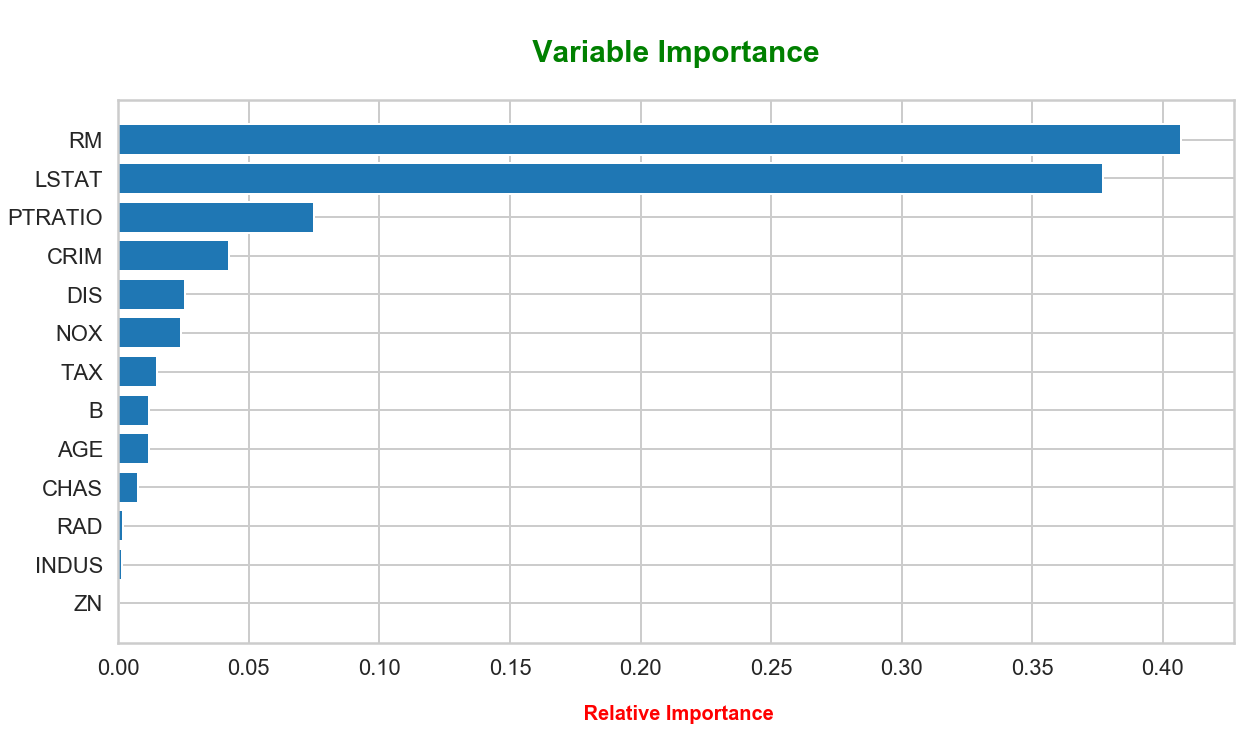

In [56]:
# Adapted from: https://gogul.dev/software/regression-example-boston-housing-prices
# plot model's feature importance
feature_importance = grad.feature_importances_

sort = np.argsort(feature_importance)
pos  = np.arange(sort.shape[0]) + .5

plt.barh(pos, feature_importance[sort], align='center')
plt.yticks(pos, attributes[sort])
plt.xlabel('\n Relative Importance', fontweight="bold", fontsize="20", color="r")
plt.title('\n Variable Importance \n', fontweight="bold", fontsize="30", color="g")
plt.show()

<a name="con"></a>
## Conclusion

Throughout the project I have explained what the code is telling us about the dataset. In this conclusion I will summarise the interesting things that I have noticed from each of the 3 section. 

Section 1: There are 506 houses and there are 13 features to which MEDV was added making it 14. I learned how to calculate the percent of missing values and learned that if more than 70% of data is missing this sould be excluded as it would impact results. Correlation allowed us to see what variables are strongly correlated. Interestingly MEDV has a strong positive correlation with RM at 0.7; MEDV has a strong negative correlation with LSAT -0.74. As stated earlier the full findings are explained under each of the plots or lines of code

Section 2: We can reject the null hypothesis as the t value is significantly less than the critical value. At a level of 0.05, there is a one in twenty chance that we incorrectly reject the null hypoothesis. Thus we can say that thie is significant difference in the mean house prices for houses along the Charles River and those that are not along the Charles River.

Section 3: This part of the project was extremely time consuming and involved alot of trial and error. Testing different combinations to get the best neural network model possibel. It is important to understand that the model presented here may not be the best representation of the dataset. One of the possible issues is the size of this dataset in general is small. Another option for this section was to use the statsmodel and select the columns that have strong reltionship with house price but do not show multicollinearity (relationship between the variables themselves). However, I feel with this project I have gained a great deal of understanding  on how to critically analysis a dataset and create neural networks using keras which was the overall goal of this project

<a name="bib"></a>
## Bibliography

1. Wingate, J., 2019. Boston Dataset scikit-learn Machine Learning in Python. R. Available at: https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/ [Accessed December 12, 2019].
2. Anon, {{metadataController.pageTitle}}. Packt Subscription. Available at: https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset [Accessed December 12, 2019].
3. Chakure, A., 2019. Implementation of Linear Regression. Medium. Available at: https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c [Accessed December 12, 2019].
4. Agarwal, A., 2018. Linear Regression on Boston Housing Dataset. Medium. Available at: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 [Accessed December 12, 2019].
5. Mwaskom, sns.heatmap top and bottom boxes are cut off · Issue #1773 · mwaskom/seaborn. GitHub. Available at: https://github.com/mwaskom/seaborn/issues/1773 [Accessed December 12, 2019].
6. Dobbins, T. et al., Predicting Housing Prices with Linear Regression using Python, pandas, and statsmodels. Learn Data Science - Tutorials, Books, Courses, and More. Available at: https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/ [Accessed December 13, 2019].
7. Ianmcloughlin, ianmcloughlin/jupyter-teaching-notebooks. GitHub. Available at: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb [Accessed December 13, 2019].
8. Anon, Multiple t tests and Type I error. Available at: http://grants.hhp.coe.uh.edu/doconnor/PEP6305/Multiple t tests.htm [Accessed December 13, 2019].
9. Anon, T Test (Student's T-Test): Definition and Examples. Statistics How To. Available at: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/ [Accessed December 13, 2019].
10. Maverick, J.B., 2019. What assumptions are made when conducting a t-test? Investopedia. Available at: https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp#t-test-assumptions [Accessed December 13, 2019].
11. Anon, Data Analysis. Data Analysis - The p-value. Available at: http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1427 [Accessed December 13, 2019].
12. Brownlee, J., 2019. A Gentle Introduction to Normality Tests in Python. Machine Learning Mastery. Available at: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/ [Accessed December 13, 2019].
13. Srivastava, S., 2019. Feature Scaling in Scikit-learn. Medium. Available at: https://medium.com/analytics-vidhya/feature-scaling-in-scikit-learn-b11209d949e7 [Accessed December 13, 2019].
14. Ralhan, A., 2018. Activation Functions: Neural Networks. Medium. Available at: https://medium.com/@abhinavr8/activation-functions-neural-networks-66220238e1ff [Accessed December 13, 2019].
15. Sharma, H., 2019. Activation Functions : Sigmoid, ReLU, Leaky ReLU and Softmax basics for Neural Networks and Deep... Medium. Available at: https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e [Accessed December 13, 2019].
16. Vivekpandian, 2019. Types of Activation Functions in Neural Network. Medium. Available at: https://medium.com/@vivekpandian08/https-medium-com-types-of-activation-functions-in-neural-network-504ddba28e35 [Accessed December 13, 2019].
17. Sambvani, A., 2018. Neural Network Glossary. Medium. Available at: https://medium.com/@alex.sambvani/neural-network-glossary-72e4f63d34db [Accessed December 13, 2019].
18. Khandelwal, R., 2019. Overview of different Optimizers for neural networks. Medium. Available at: https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3 [Accessed December 13, 2019].
19. Stephanie, 2019. Mean Squared Error: Definition and Example. Statistics How To. Available at: https://www.statisticshowto.datasciencecentral.com/mean-squared-error/ [Accessed November 29, 2019].
20. Khandelwal, R., 2019. Overview of different Optimizers for neural networks. Medium. Available at: https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3 [Accessed December 13, 2019].
21. Chm, 2018. Tutorial on Keras flow_from_dataframe. mc.ai. Available at: https://mc.ai/tutorial-on-keras-flow_from_dataframe/ [Accessed December 13, 2019].
22. Anon, Practical Data Science with SAP. Google Books. Available at: https://books.google.ie/books?id=QlKwDwAAQBAJ&pg=PA129&lpg=PA129&dq=validation_split=0.25&source=bl&ots=oxLdAlD6ds&sig=ACfU3U16m4DaUBTiQe2p8LrzsFaR2u2lzQ&hl=en&sa=X&ved=2ahUKEwi88bfdubPmAhVXilwKHYOzAaAQ6AEwBnoECAoQAQ#v=onepage&q=validation_split=0.25&f=false [Accessed December 13, 2019].
23. Gogul Ilango, 2018. Predicting Housing Prices using Regression Algorithms. Gogul Ilango. Available at: https://gogul.dev/software/regression-example-boston-housing-prices [Accessed December 13, 2019].
24. Jj, 2016. MAE and RMSE - Which Metric is Better? Medium. Available at: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d [Accessed December 13, 2019].